# Project description
<table><tr>
<td> <img src="./images/export.jpeg"  alt="Drawing" style="width: 450px"/> </td>
<td> <img src="./images/cycle.jpeg"  alt="Drawing" style="width: 360px"/> </td>
</tr></table>

A huge amount of health data is stored in our watches. I want through this project to explore the sleep data stored in my Garmin Fenix watch and try to capture some patterns or important information that could eventually lead to self-improvement and even self-transformation. The goal of this project is to use the data to build a model that could returns the probability I am asleep at a certain time. 

Before we start, it's important to find a way to extract the data in usable format from my watch

## How to get the Raw Export of Apple health data

- It turns out that the Healh application in my iphone can collect the data on my Garmin. 
In order to get all the raw stored data, go into the "Apple Health" app, tap on your user icon and select "Export Health Data". The result is file called "export.zip". The file can be transfered to a mac with Airdrop or email, etc.


- You will discover two files: export.xml and export_cda.xml
- Now we just need to find a way to transform these xml files into a more convenient csv file. 
- Fortunately, somebody has already thought about it
## Converting Apple Health XML to CSV with Python 

We're going to use the parser code found in this Github directory [https://github.com/markwk/qs_ledger]( https://github.com/markwk/qs_ledger)


In [ ]:
%run -i 'apple-health-data-parser' 'data/export.xml' 

In [4]:
import numpy as np
import pandas as pd

# Load Sleep data

In [5]:
sleep = pd.read_csv("data/SleepAnalysis.csv")
sleep.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Clock,50.0,"<<HKDevice: 0x283754280>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-01-22 06:48:51 +0100,2018-01-21 23:29:36 +0100,2018-01-22 06:30:24 +0100,HKCategoryValueSleepAnalysisInBed
1,Clock,50.0,"<<HKDevice: 0x283754280>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-01-22 06:48:51 +0100,2018-01-22 06:32:56 +0100,2018-01-22 06:48:51 +0100,HKCategoryValueSleepAnalysisInBed
2,Clock,50.0,"<<HKDevice: 0x283754280>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-01-23 06:30:42 +0100,2018-01-22 23:24:08 +0100,2018-01-23 06:30:36 +0100,HKCategoryValueSleepAnalysisInBed
3,Clock,50.0,"<<HKDevice: 0x283754280>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-01-24 06:30:34 +0100,2018-01-23 23:08:12 +0100,2018-01-24 06:30:28 +0100,HKCategoryValueSleepAnalysisInBed
4,Clock,50.0,"<<HKDevice: 0x283754280>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-01-25 07:00:30 +0100,2018-01-25 02:45:00 +0100,2018-01-25 07:00:24 +0100,HKCategoryValueSleepAnalysisInBed


In [6]:
sleep_data = sleep.copy()
sleep_data.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Clock,50.0,"<<HKDevice: 0x283754280>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-01-22 06:48:51 +0100,2018-01-21 23:29:36 +0100,2018-01-22 06:30:24 +0100,HKCategoryValueSleepAnalysisInBed
1,Clock,50.0,"<<HKDevice: 0x283754280>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-01-22 06:48:51 +0100,2018-01-22 06:32:56 +0100,2018-01-22 06:48:51 +0100,HKCategoryValueSleepAnalysisInBed
2,Clock,50.0,"<<HKDevice: 0x283754280>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-01-23 06:30:42 +0100,2018-01-22 23:24:08 +0100,2018-01-23 06:30:36 +0100,HKCategoryValueSleepAnalysisInBed
3,Clock,50.0,"<<HKDevice: 0x283754280>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-01-24 06:30:34 +0100,2018-01-23 23:08:12 +0100,2018-01-24 06:30:28 +0100,HKCategoryValueSleepAnalysisInBed
4,Clock,50.0,"<<HKDevice: 0x283754280>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-01-25 07:00:30 +0100,2018-01-25 02:45:00 +0100,2018-01-25 07:00:24 +0100,HKCategoryValueSleepAnalysisInBed


In [7]:
sleep_data.drop(['sourceName','sourceVersion', 'type','unit',
                              'value','device','creationDate'], axis=1, inplace=True)
sleep_data.head()

,startDate,endDate
0,2018-01-21 23:29:36 +0100,2018-01-22 06:30:24 +0100
1,2018-01-22 06:32:56 +0100,2018-01-22 06:48:51 +0100
2,2018-01-22 23:24:08 +0100,2018-01-23 06:30:36 +0100
3,2018-01-23 23:08:12 +0100,2018-01-24 06:30:28 +0100
4,2018-01-25 02:45:00 +0100,2018-01-25 07:00:24 +0100


In [8]:
sleep_data.dtypes

startDate    object
endDate      object
dtype: object

In [9]:
sleep_data['startDate'] = pd.to_datetime(sleep_data['startDate'])
sleep_data['endDate'] = pd.to_datetime(sleep_data['endDate'])
sleep_data.head()

,startDate,endDate
0,2018-01-21 23:29:36+01:00,2018-01-22 06:30:24+01:00
1,2018-01-22 06:32:56+01:00,2018-01-22 06:48:51+01:00
2,2018-01-22 23:24:08+01:00,2018-01-23 06:30:36+01:00
3,2018-01-23 23:08:12+01:00,2018-01-24 06:30:28+01:00
4,2018-01-25 02:45:00+01:00,2018-01-25 07:00:24+01:00


# Data preprocessing 

- Remove Time zone shift from dates
- Select the time interval of interest
- Generate a column to note the sleep duration of each day.
- In case it is less than 2 hours, remove the corresponding row data.
- Generate two tables, one for awake and the other for asleep data

## Remove Time zone shift from dates

In [10]:
# sleep_data['startDate'] = pd.to_datetime(sleep_data['startDate'], format='Y-%m-%d %I-%p')
sleep_data['startDate'] = sleep_data['startDate'].dt.tz_localize(None)
sleep_data['endDate'] = sleep_data['endDate'].dt.tz_localize(None)
sleep_data.head()


,startDate,endDate
0,2018-01-21 23:29:36,2018-01-22 06:30:24
1,2018-01-22 06:32:56,2018-01-22 06:48:51
2,2018-01-22 23:24:08,2018-01-23 06:30:36
3,2018-01-23 23:08:12,2018-01-24 06:30:28
4,2018-01-25 02:45:00,2018-01-25 07:00:24


## Select the time interval of interest

- I am going to select a period of time where there is a successive days I have been wearing my watch during my sleep. 
- This period of time happens to vary between Nov-22-2020 and Jan-22-2021 

In [11]:
start_time = pd.to_datetime('11/22/2020')
end_time= pd.to_datetime('01/22/2021')
end_time

Timestamp('2021-01-22 00:00:00')

In [12]:
pd.set_option('display.max_rows',10000)
sleep_data = sleep_data.loc[(sleep_data.startDate >= start_time) & (sleep_data.startDate <= end_time) , : ]
len(sleep_data)

664

## Remarks
Note that for each day we may have many sleeping periods. For what we want to achieve, let us just consider the sleeping time as the instant where the watch noted that we are asleep. And the time we woke up as the last time
- Let us show the rows ( interval of time) that holds at elast 5 hours to see
- Even better to see, add another column with sleep duration 

In [13]:

sleep_data['sleepDuration'] = (sleep_data.endDate - sleep_data.startDate) / pd.Timedelta(minutes=1)


In [ ]:
sleep_data

## Remarks
Assuming that I organize myself to always have at least 5 hours sleep, and noting the fact that a summary of the sleep duration is given at the end of each sleep period, I would consider only the rows that accumulate at least 300 minutes sleep time.

In [14]:
sleep_periods = sleep_data.loc[sleep_data.sleepDuration > 300, :]

In [15]:
sleep_periods.head()

,startDate,endDate,sleepDuration
284,2020-11-22 00:31:00,2020-11-22 08:21:00,470.000000
297,2020-11-23 00:25:22,2020-11-23 07:00:02,394.666667
302,2020-11-22 23:39:00,2020-11-23 08:32:00,533.000000
310,2020-11-24 00:47:17,2020-11-24 07:00:00,372.716667
312,2020-11-24 00:55:00,2020-11-24 08:07:00,432.000000


## Remarks

- It's interesting to note that sometimes for the same day we have two sleeping intervals.This might happen if one would fall asleep again for some extra time after waking up.
- Note for example row 470	with : `2020-12-09 23:15:00" |	2020-12-10 06:00:21	405.35`  and
- row 475 with :         `2020-12-09 22:17:00  |	2020-12-10 07:40:00	563.00`
- In the case where this happens I will consider the the 'later' time of sleep, that is ` 23:15:00` and the later time of wake up `07:40:00`. so by removing two rows I will replace them with a new interval. 
- Note that we may sometimes have 3 complete sleeping intervals > 300 minutes. We will apply the same idea whether we have two or more intervals > 300 minutes for the same day. 

In [16]:
len(sleep_periods)
sleep_periods.dtypes

startDate        datetime64[ns]
endDate          datetime64[ns]
sleepDuration           float64
dtype: object

In [17]:
# sleep_periods['startDate'] = sleep_periods.groupby('startDate')['date'].apply(lambda x: x.sort_values())
# grouped = sleep_periods.groupby('startDate')
# for day, group in grouped:
#     print(day)
#     print(group)

## Sort by endDate
- Be carefull here, because we need to sort by endDate, otherwise we will end up gathering nights of the next day with the current day.
- Sorting by endDate is the good strategy since no matter if we slept at 1 pm or at 23 the previous day, we will always gather the correct night

In [18]:
sleep_periods = sleep_periods.sort_values('endDate')
sleep_periods.head()

,startDate,endDate,sleepDuration
284,2020-11-22 00:31:00,2020-11-22 08:21:00,470.000000
297,2020-11-23 00:25:22,2020-11-23 07:00:02,394.666667
302,2020-11-22 23:39:00,2020-11-23 08:32:00,533.000000
310,2020-11-24 00:47:17,2020-11-24 07:00:00,372.716667
312,2020-11-24 00:55:00,2020-11-24 08:07:00,432.000000


In [19]:
sleep_periods.head()

,startDate,endDate,sleepDuration
284,2020-11-22 00:31:00,2020-11-22 08:21:00,470.000000
297,2020-11-23 00:25:22,2020-11-23 07:00:02,394.666667
302,2020-11-22 23:39:00,2020-11-23 08:32:00,533.000000
310,2020-11-24 00:47:17,2020-11-24 07:00:00,372.716667
312,2020-11-24 00:55:00,2020-11-24 08:07:00,432.000000


## Construct a new table

- let's construct a new table and fill it with our sleep data after removing the redundant rows. 
- Remember that for the case we have multiple rows for the same date, consider the latest hour of sleep and the latest hour of waking up.
- Recalculate the sleepDuration
- Save the new row in the new table 

In [20]:
sleep_periods.dtypes

startDate        datetime64[ns]
endDate          datetime64[ns]
sleepDuration           float64
dtype: object

In [21]:
# sleep_periods['sleepTime'] = sleep_periods.to_datetime(sleep_periods['startDate'], format= '%H:%M:%S')

In [22]:
sleep_periods.reset_index(drop=True, inplace=True)

In [23]:
sp = sleep_periods.copy()
sp.head()

,startDate,endDate,sleepDuration
0,2020-11-22 00:31:00,2020-11-22 08:21:00,470.000000
1,2020-11-23 00:25:22,2020-11-23 07:00:02,394.666667
2,2020-11-22 23:39:00,2020-11-23 08:32:00,533.000000
3,2020-11-24 00:47:17,2020-11-24 07:00:00,372.716667
4,2020-11-24 00:55:00,2020-11-24 08:07:00,432.000000


In [24]:
spt = sp.groupby(pd.to_datetime(sp['endDate']).dt.date, sort=False)['startDate','endDate'].max()
spt.head()


,startDate,endDate
endDate,,
2020-11-22,2020-11-22 00:31:00,2020-11-22 08:21:00
2020-11-23,2020-11-23 00:25:22,2020-11-23 08:32:00
2020-11-24,2020-11-24 00:55:00,2020-11-24 08:07:00
2020-11-25,2020-11-25 00:14:58,2020-11-25 08:18:00
2020-11-26,2020-11-26 01:12:00,2020-11-26 08:02:00


In [42]:
# spt = spt.drop(pd.Timestamp('2020-12-31'))
# spt = spt.drop(pd.Timestamp('2020-12-28'))
spt = spt.drop(pd.Timestamp('2021-01-07'))

In [43]:
spt['sleepDuration'] = (spt.endDate - spt.startDate) / pd.Timedelta(minutes=1)
len(spt)

52

In [44]:
spt

,startDate,endDate,sleepDuration
endDate,,,
2020-11-22,2020-11-22 00:31:00,2020-11-22 08:21:00,470.000000
2020-11-23,2020-11-23 00:25:22,2020-11-23 08:32:00,486.633333
2020-11-24,2020-11-24 00:55:00,2020-11-24 08:07:00,432.000000
2020-11-25,2020-11-25 00:14:58,2020-11-25 08:18:00,483.033333
2020-11-26,2020-11-26 01:12:00,2020-11-26 08:02:00,410.000000
2020-11-27,2020-11-26 23:53:00,2020-11-27 09:27:00,574.000000
2020-11-28,2020-11-28 00:10:00,2020-11-28 09:41:00,571.000000
2020-11-29,2020-11-29 01:06:00,2020-11-29 08:53:00,467.000000
2020-11-30,2020-11-30 00:11:00,2020-11-30 08:38:00,507.000000


,startDate,endDate,sleepDuration
endDate,,,
2020-11-22,2020-11-22 00:31:00,2020-11-22 08:21:00,470.000000
2020-11-23,2020-11-23 00:25:22,2020-11-23 08:32:00,486.633333
2020-11-24,2020-11-24 00:55:00,2020-11-24 08:07:00,432.000000
2020-11-25,2020-11-25 00:14:58,2020-11-25 08:18:00,483.033333
2020-11-26,2020-11-26 01:12:00,2020-11-26 08:02:00,410.000000
2020-11-27,2020-11-26 23:53:00,2020-11-27 09:27:00,574.000000
2020-11-28,2020-11-28 00:10:00,2020-11-28 09:41:00,571.000000
2020-11-29,2020-11-29 01:06:00,2020-11-29 08:53:00,467.000000
2020-11-30,2020-11-30 00:11:00,2020-11-30 08:38:00,507.000000


## Create two tables: wake_data and sleep_data
- For each endDate we need to generate the index column starting with the date before endDate, since our night might start the date before. 
- For each endDate element that we select from the `spt table ` we need to reset the hour to our selected interval. That is:
- We are interested in the time interval going from `22:00:00` to `02:59:00`
- Concatenate each set of index 
- Another idea would have been to generate the full index once and for all, then delete the intervals that correspond to a sleep night where data was not recorded
- I go with the first choice since it appears more efficient.

In [45]:
# Initialize the index for sleep table with datetime64[ns] dtype
idx = pd.Index([],dtype='datetime64[ns]', freq='T')

indic = []
# Generate the offset vector: 5hours spread into [-120, 180] minutes
range_sleep = np.arange(-120, 120,1)
offset = np.tile(range_sleep, len(spt))

for i in range(len(spt)):
    
    ts_i = (spt.iloc[i]['endDate'] - pd.DateOffset(1)).replace(hour=22, minute=0, second=0)
    ts_f = spt.iloc[i]['endDate'].replace(day= spt.iloc[i]['endDate'].day, hour=1, minute=59, second=0)
    rge = pd.date_range(ts_i, ts_f, freq ='1min' )
    indic.append((rge >= spt.iloc[i]['startDate']).astype(int))
    idx = idx.union(pd.Index(rge))
    
# Flatten the list of indic
indic_flattened = [item for sublist in indic for item in sublist]  
 

## Table for seep time 
- Initialize a data frame

In [46]:
data = {'indicator': indic_flattened,
        'offset':offset}

In [47]:
sleep_table = pd.DataFrame(data, index = idx)
sleep_table.head()

,indicator,offset
2020-11-21 22:00:00,0,-120
2020-11-21 22:01:00,0,-119
2020-11-21 22:02:00,0,-118
2020-11-21 22:03:00,0,-117
2020-11-21 22:04:00,0,-116


In [54]:
## Save table
sleep_table.to_csv('sleep_data.csv')

Set to value 1 all the time sleeping

## Table for waking time 

In [ ]:
# Initialize the index for sleep table with datetime64[ns] dtype
idx = pd.Index([],dtype='datetime64[ns]', freq='T')

indic = []
# Generate the offset vector: 5hours spread into [-120, 180] minutes
range_wake = np.arange(-120, 120,1)
offset = np.tile(range_sleep, len(spt))

for i in range(len(spt)):
    
    ts_i = (spt.iloc[i]['endDate']).replace(hour=7, minute=0, second=0)
    ts_f = spt.iloc[i]['endDate'].replace(day= spt.iloc[i]['endDate'].day, hour=10, minute=59, second=0)
    rge = pd.date_range(ts_i, ts_f, freq ='1min' )
    indic.append((rge <= spt.iloc[i]['endDate']).astype(int))
    idx = idx.union(pd.Index(rge))
    
# Flatten the list of indic
indic_flattened = [item for sublist in indic for item in sublist]
len(flatten)    



In [52]:
data = {'indicator': indic_flattened,
        'offset':offset}
wake_table = pd.DataFrame(data, index = idx)
wake_table.head(10)

,indicator,offset
2020-11-22 07:00:00,1,-120
2020-11-22 07:01:00,1,-119
2020-11-22 07:02:00,1,-118
2020-11-22 07:03:00,1,-117
2020-11-22 07:04:00,1,-116
2020-11-22 07:05:00,1,-115
2020-11-22 07:06:00,1,-114
2020-11-22 07:07:00,1,-113
2020-11-22 07:08:00,1,-112
2020-11-22 07:09:00,1,-111


In [75]:
# Save wake table
wake_table.to_csv('wake_data.csv')

## Data Exploration
For the example I am presenting, the wake and sleep data contain 52 days of information. Note that watch records the time of sleep and waking up based on heart rate and using the gyro sensors for motion. It is not extremely accurate. I had to remove two days from the sets since they appeared to me as outliers and did not want it to influence my analysis. 

First let us import the required libraries

In [218]:
import pandas as pd
import numpy as np

import scipy
from scipy import stats

# Use pymc3 for Bayesian inference
import pymc3 as pm
import theano.tensor as tt
import scipy
from scipy import optimize

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib

import json
s = json.load(open('./style/bmh_matplotlibrc.json'))
matplotlib.rcParams.update(s)
matplotlib.rcParams['figure.figsize'] = (10, 3)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['ytick.major.size'] = 20
# matplotlib.rcParams['figure.constrained_layout.use'] = True

# Number of samples for Markov Chain Monte Carlo
N_SAMPLES = 5000

/Users/obara/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]


In [76]:
# Load the data
sleep_data = pd.read_csv('sleep_data.csv')
wake_data = pd.read_csv('wake_data.csv')

# Labels 
sleep_labels = ['22:00', '23:00','00:00', '01:00', '02:00']
wake_labels = ['07:00', '08:00', '09:00', '10:00', '11:00']

In [60]:
len(wake)

12480

In [112]:
sleep_data.head()

,Unnamed: 0,indicator,offset
0,2020-11-21 22:00:00,0,-120
1,2020-11-21 22:01:00,0,-119
2,2020-11-21 22:02:00,0,-118
3,2020-11-21 22:03:00,0,-117
4,2020-11-21 22:04:00,0,-116


In [114]:
wake_data.head()

,Unnamed: 0,indicator,offset
0,2020-11-22 07:00:00,1,-120
1,2020-11-22 07:01:00,1,-119
2,2020-11-22 07:02:00,1,-118
3,2020-11-22 07:03:00,1,-117
4,2020-11-22 07:04:00,1,-116


## Sleep data
The observations represented by circles in the graph below at specific time have a certain intensity corresponding to the number of point at that time.

We can see that I tend to sleep around 12:30

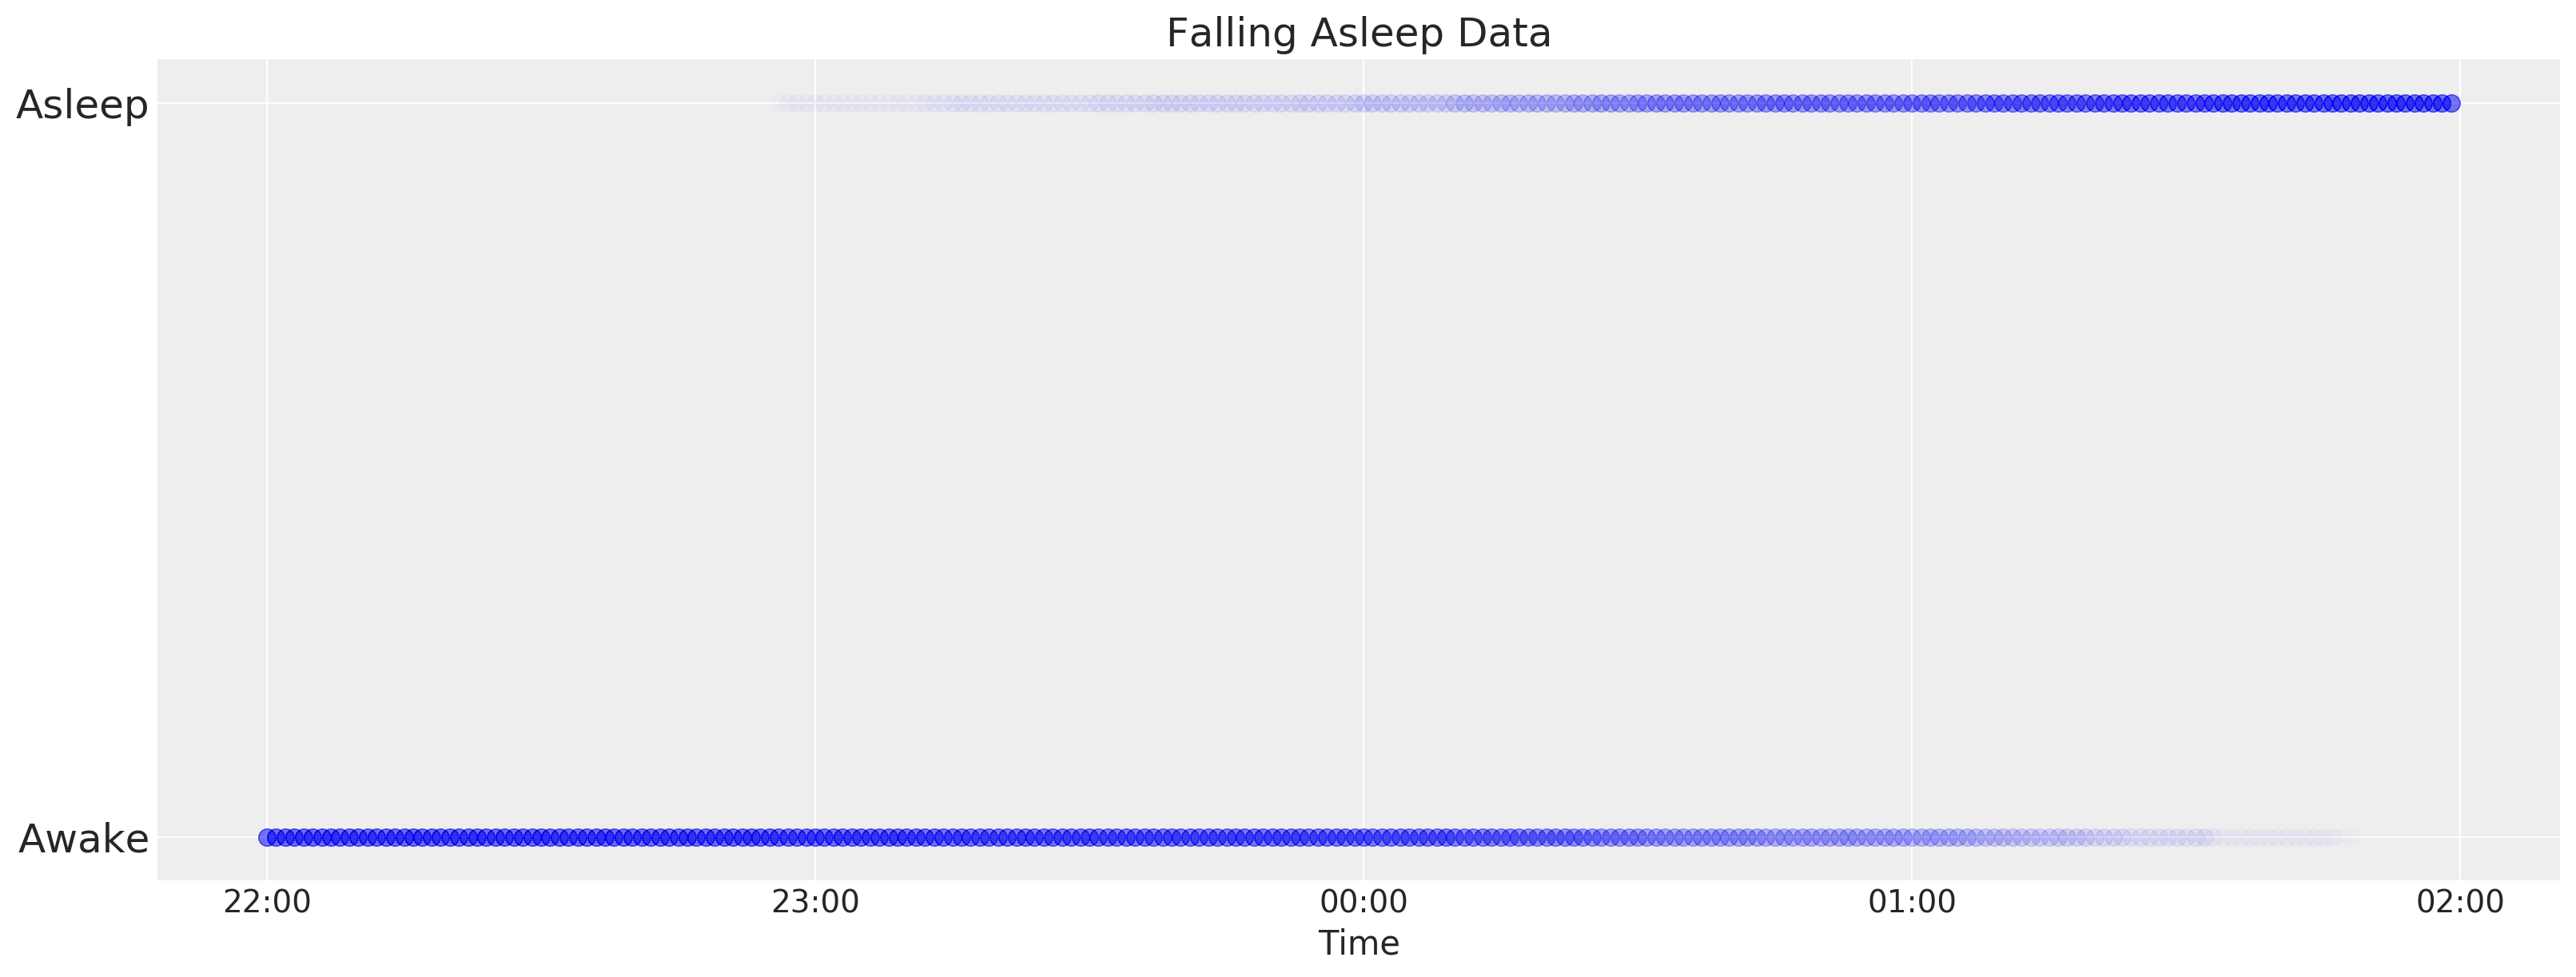

In [297]:
figsize(16, 6)
%config InlineBackend.figure_format = 'retina'

plt.scatter(sleep_data['offset'], sleep_data['indicator'],
           s = 60, alpha =0.01, facecolor ='b', edgecolors='b')
plt.yticks([0, 1], ['Awake', 'Asleep'], size=18);
plt.xlabel('Time')
plt.title('Falling Asleep Data', size = 18)
plt.xticks([-120, -60, 0, 60, 120], sleep_labels);

## Waking up Data
Notice that I tend to wake up around 8 each morning.

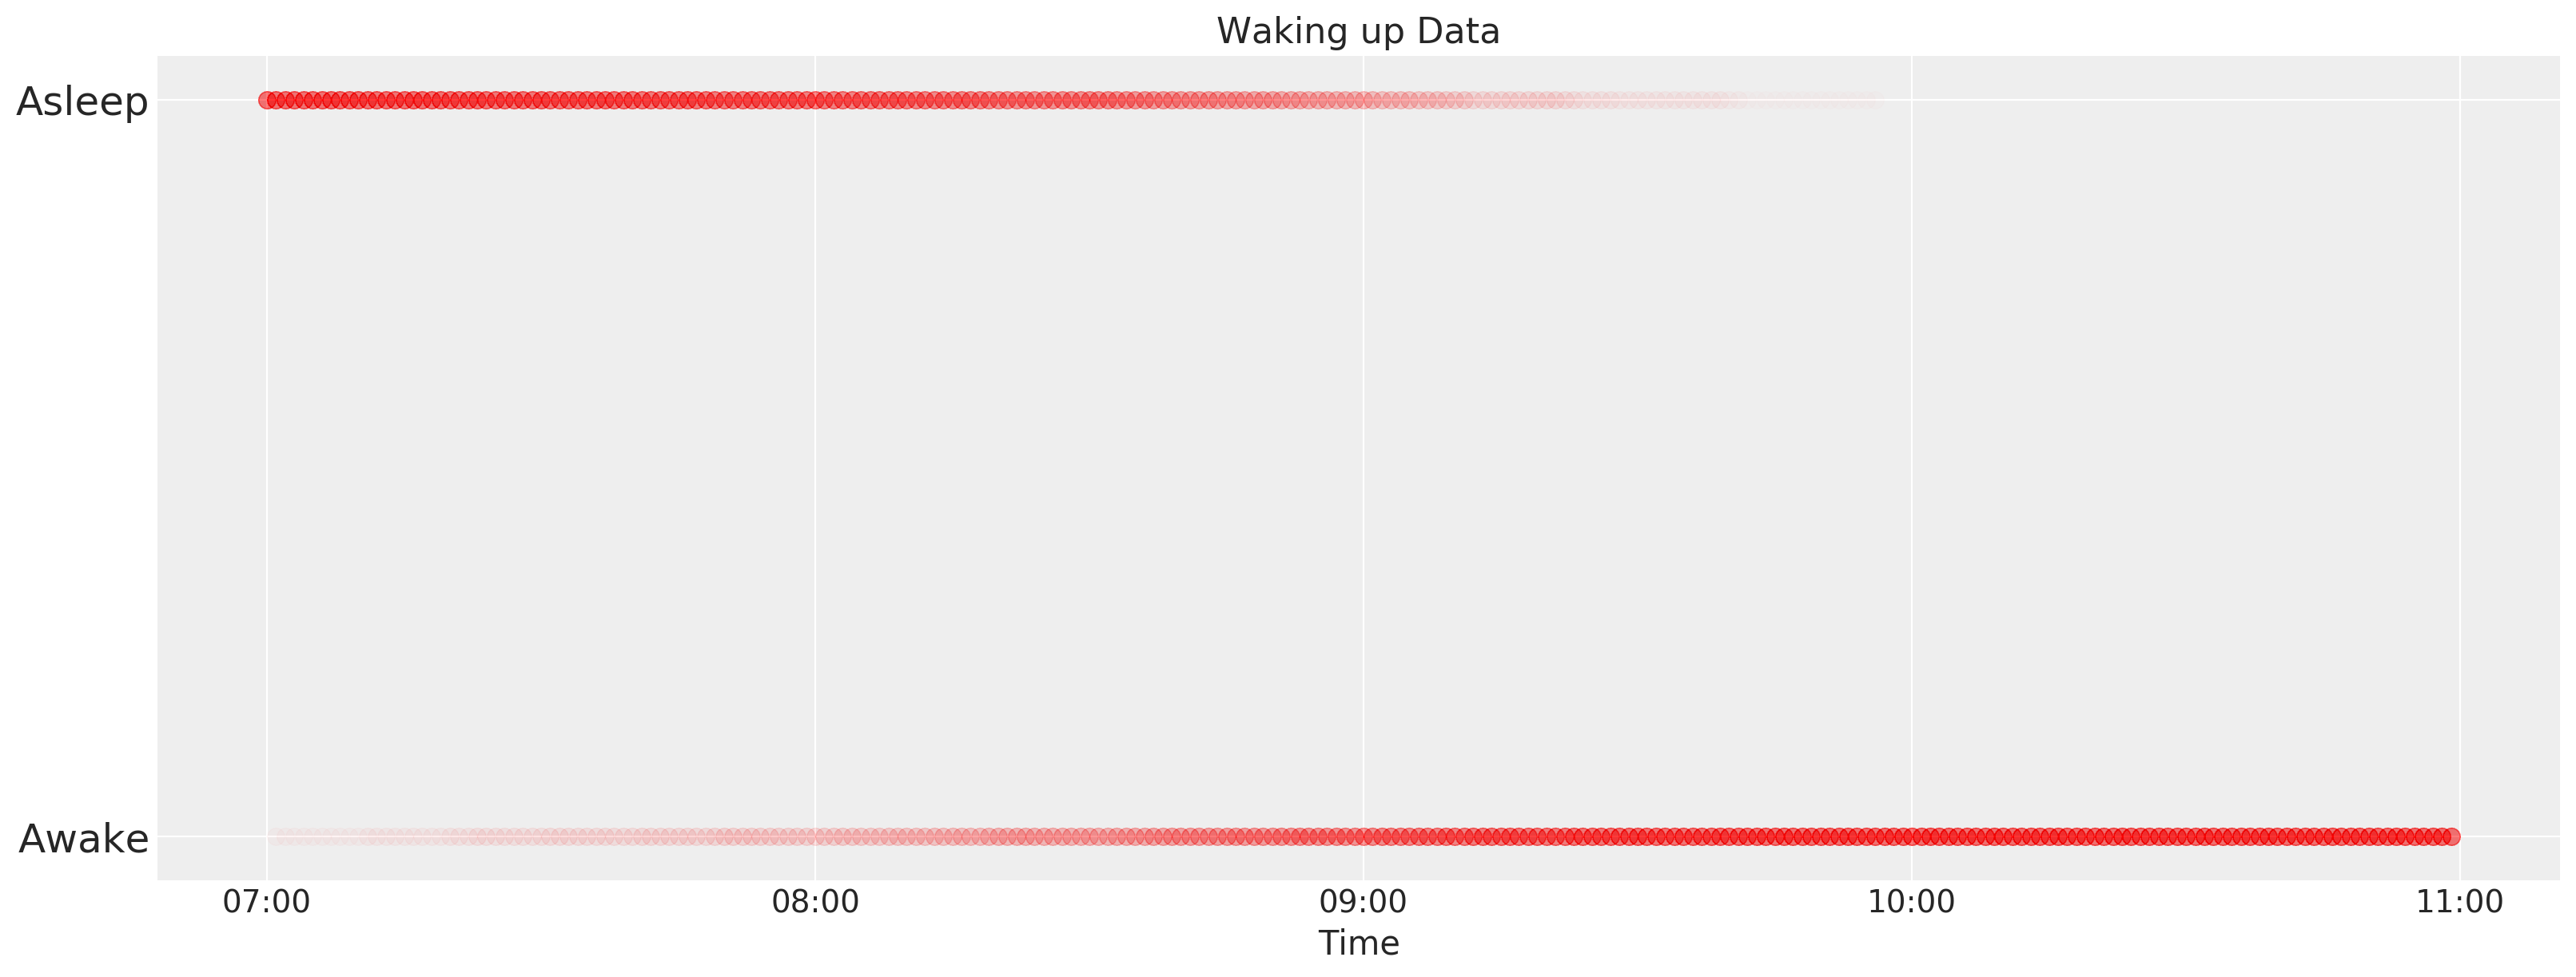

In [298]:
plt.scatter(wake_data['offset'], wake_data['indicator'],
           s=60, alpha=0.01, facecolor ='r', edgecolors='r');
plt.yticks([0, 1], ['Awake', 'Asleep'], size=18);
plt.xlabel('Time')
plt.title('Waking up Data')
plt.xticks([-120, -60, 0, 60, 120], wake_labels);

## Logistic Function as a Model for Transition
We want to select a function to represent the transition state between being awake to sleeping and that of being sleeping to awake in a similar fashion. Let us consider the logistic probability distribution for sleep as a function of time :
$$p(s|t) = \frac{1}{ 1 + e^{\;\beta t } }$$
- We are interested to estimate the unknown parameter $\beta$ using a sampling technique called Markov Chain Monte Carlo. 
- MCMC samples from the prior distribution of the parameter by maximizing the likelihood 

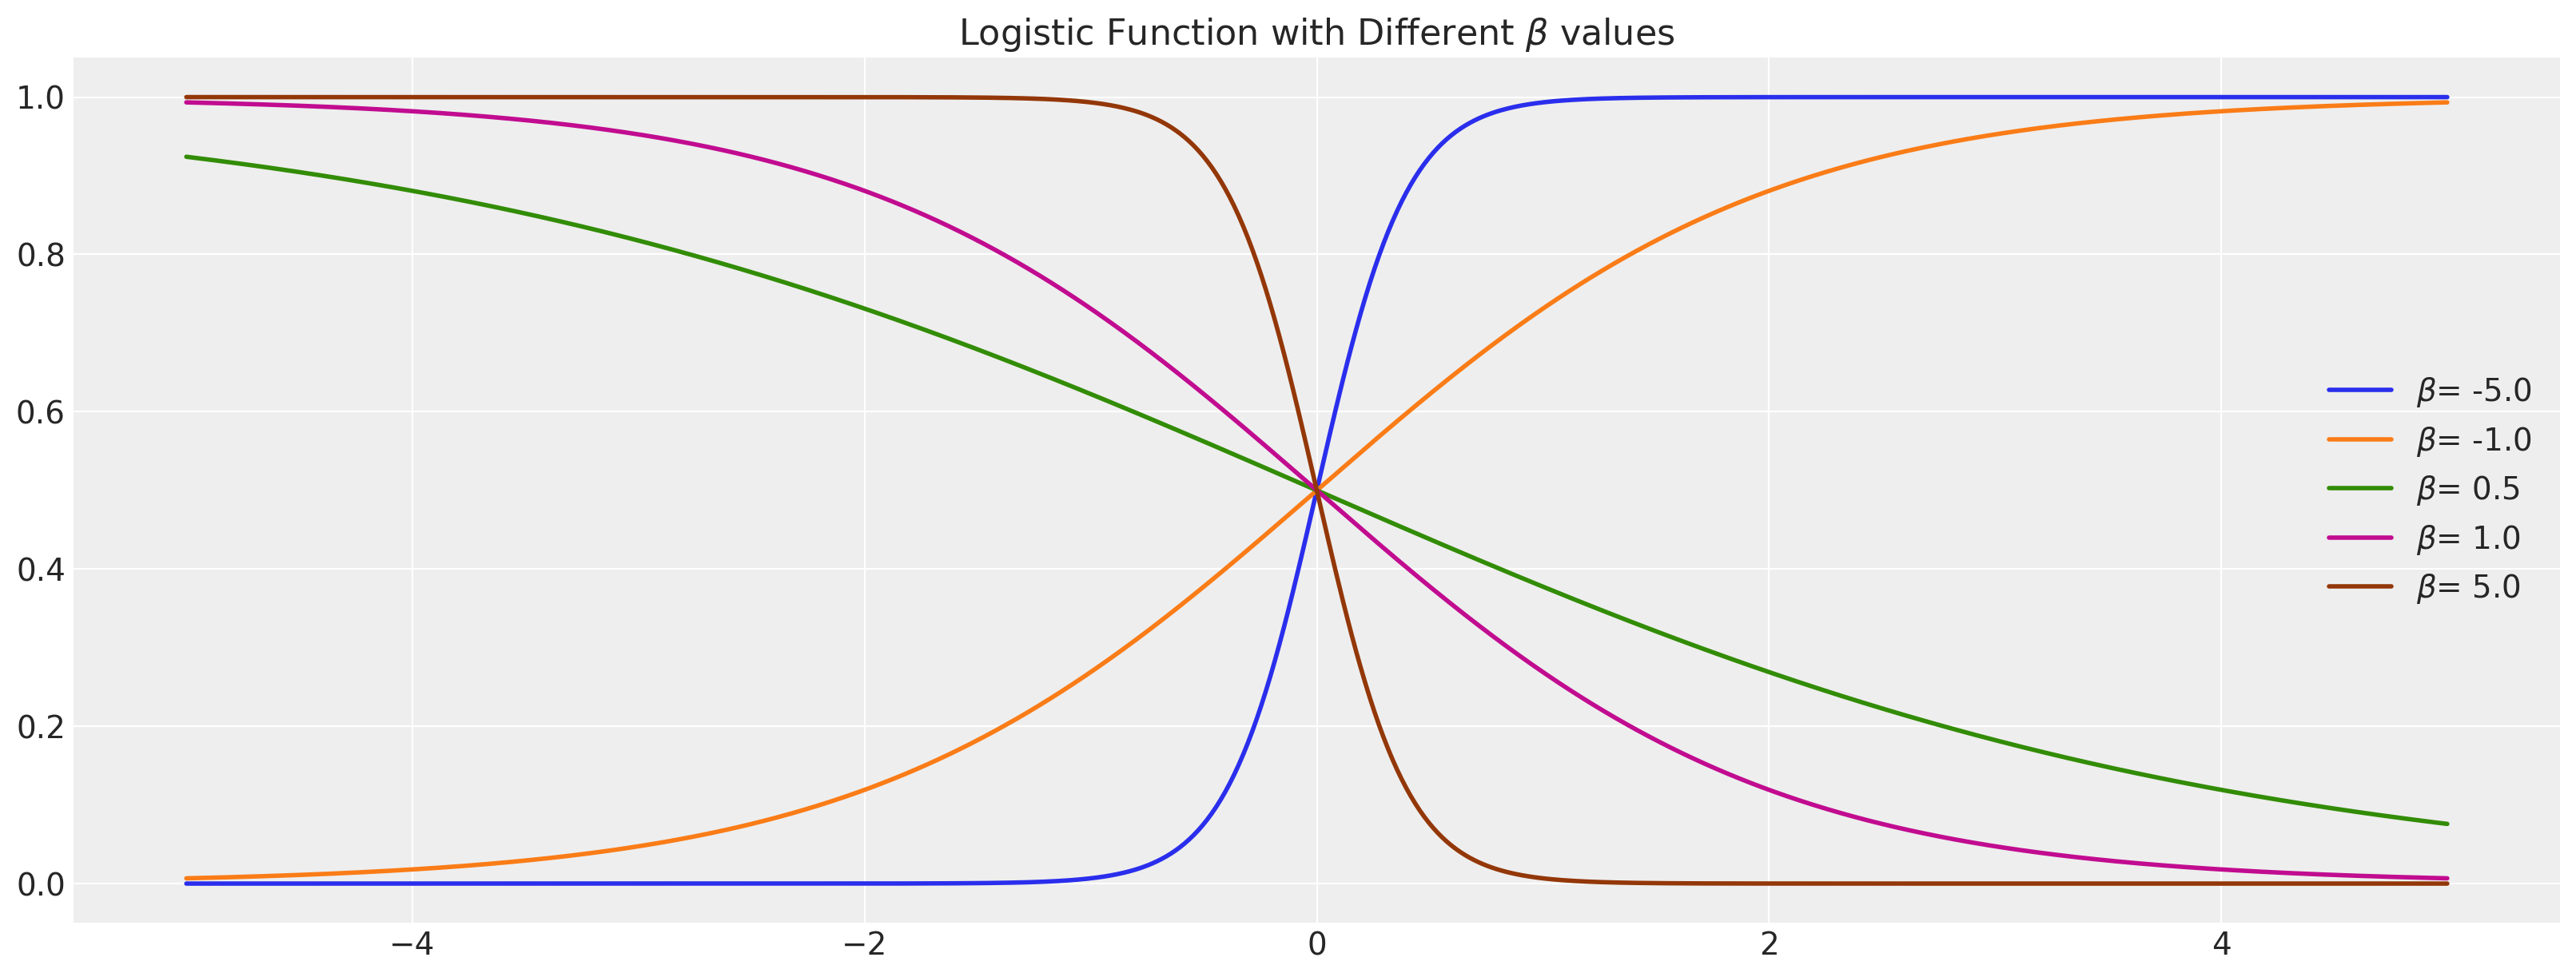

In [205]:
# logistic function with beta parameter 
def logistic(x, beta):
    return 1. / (1. + np.exp(beta * x))
# Plot examples with different betas 
x = np.linspace(-5, 5, 1000)
for beta in [-5, -1, 0.5, 1, 5]:
    plt.plot(x, logistic(x, beta), label =r"$\beta$= %.1f" % beta);
    
plt.legend();
plt.title(r'Logistic Function with Different $\beta$ values');

Note that the logistic function is symmetric. The transition in our data is not that symmetric as one can observe in the first figures. We add a bias to the logistic function to account for this fact.
$$p(t) = \frac{1}{ 1 + e^{\;\beta t + \alpha} }$$

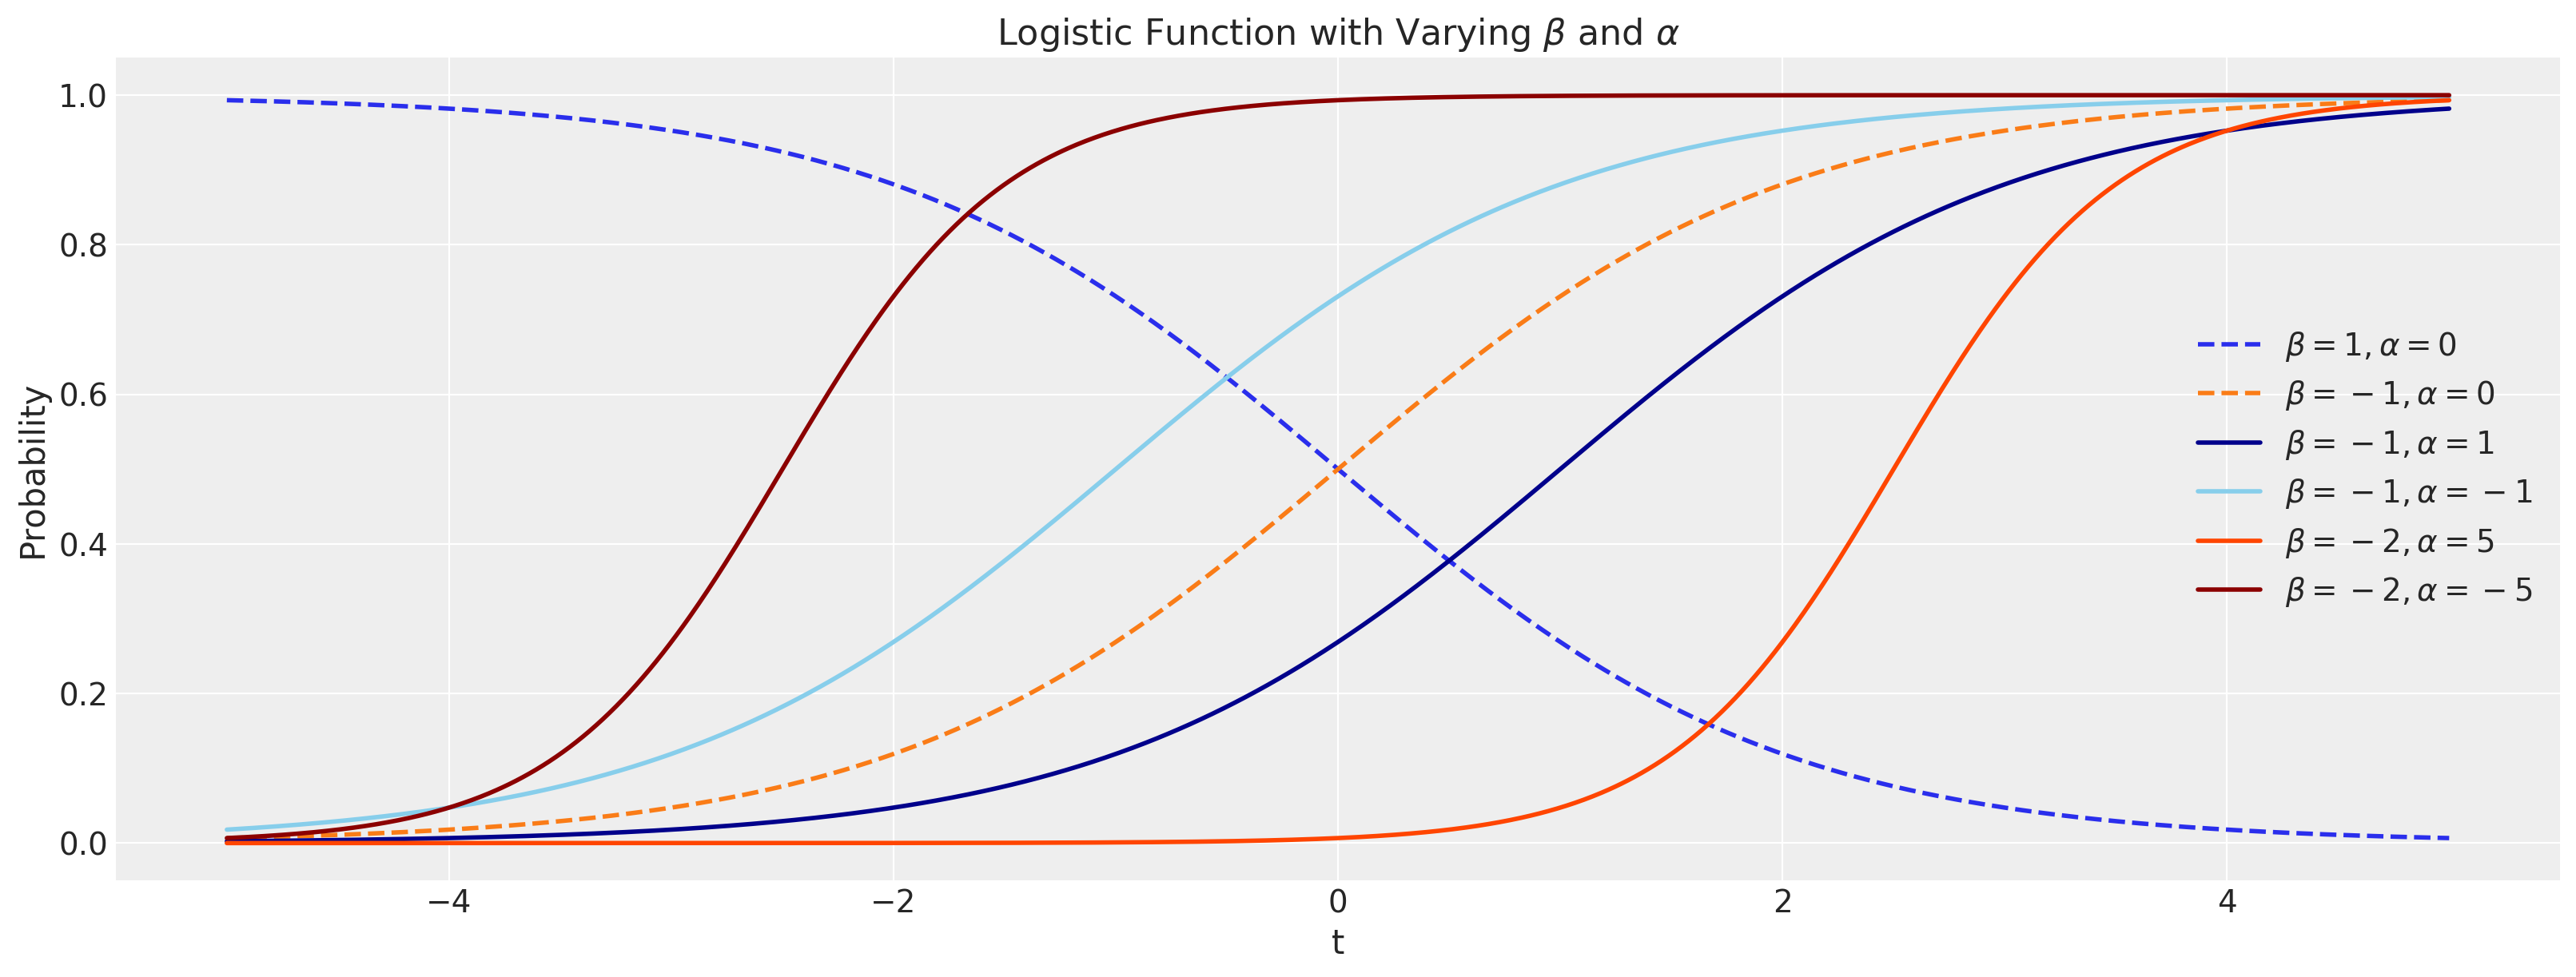

In [206]:
# Logistic function with two parameters 
def logistic(x, beta, alpha=0):
    return 1. / (1 + np.exp(beta * x + alpha))

x=np.linspace(-5, 5, 1000)
                 
plt.plot(x, logistic(x, beta=1), label=r"$\beta = 1, \alpha = 0$", ls="--", lw=2)
plt.plot(x, logistic(x, beta=-1), label=r"$\beta = -1, \alpha = 0$", ls="--", lw=2)

plt.plot(x, logistic(x, -1, 1), 
         label=r"$\beta = -1, \alpha = 1$", color="darkblue")
plt.plot(x, logistic(x, -1, -1),
         label=r"$\beta = -1, \alpha = -1$", color="skyblue")
plt.plot(x, logistic(x, -2, 5), 
         label=r"$\beta = -2, \alpha = 5$", color="orangered")
plt.plot(x, logistic(x, -2, -5), 
         label=r"$\beta = -2, \alpha = -5$", color="darkred")
plt.legend(); plt.ylabel('Probability'); plt.xlabel('t')
plt.title(r'Logistic Function with Varying $\beta$ and $\alpha$');              

- Note that the parameter $\beta$ is responsible for the steepnes of the curve.
- The parameter $\alpha$ introduced some shift in the location

## Choose a prior for the parameters $\beta$ and $\alpha$
Although the choice of the prior can be different, let us choose a normal distribution. The normal distribution is defined by a mean $\mu$ and a precision $\tau$. The precision is the reciprocal of the variance. This is just more intuitif, since high precision is equivalent with low spread of the data, i.e., lower variance. 
$$ f(x | \mu, \tau) = \sqrt{\frac{\tau}{2\pi}} \exp\left( -\frac{\tau}{2} (x - \mu)^2 \right) $$

## Parameter Search Space

Text(0.5, 0.92, 'Parameter Search Space for Normal Priors')

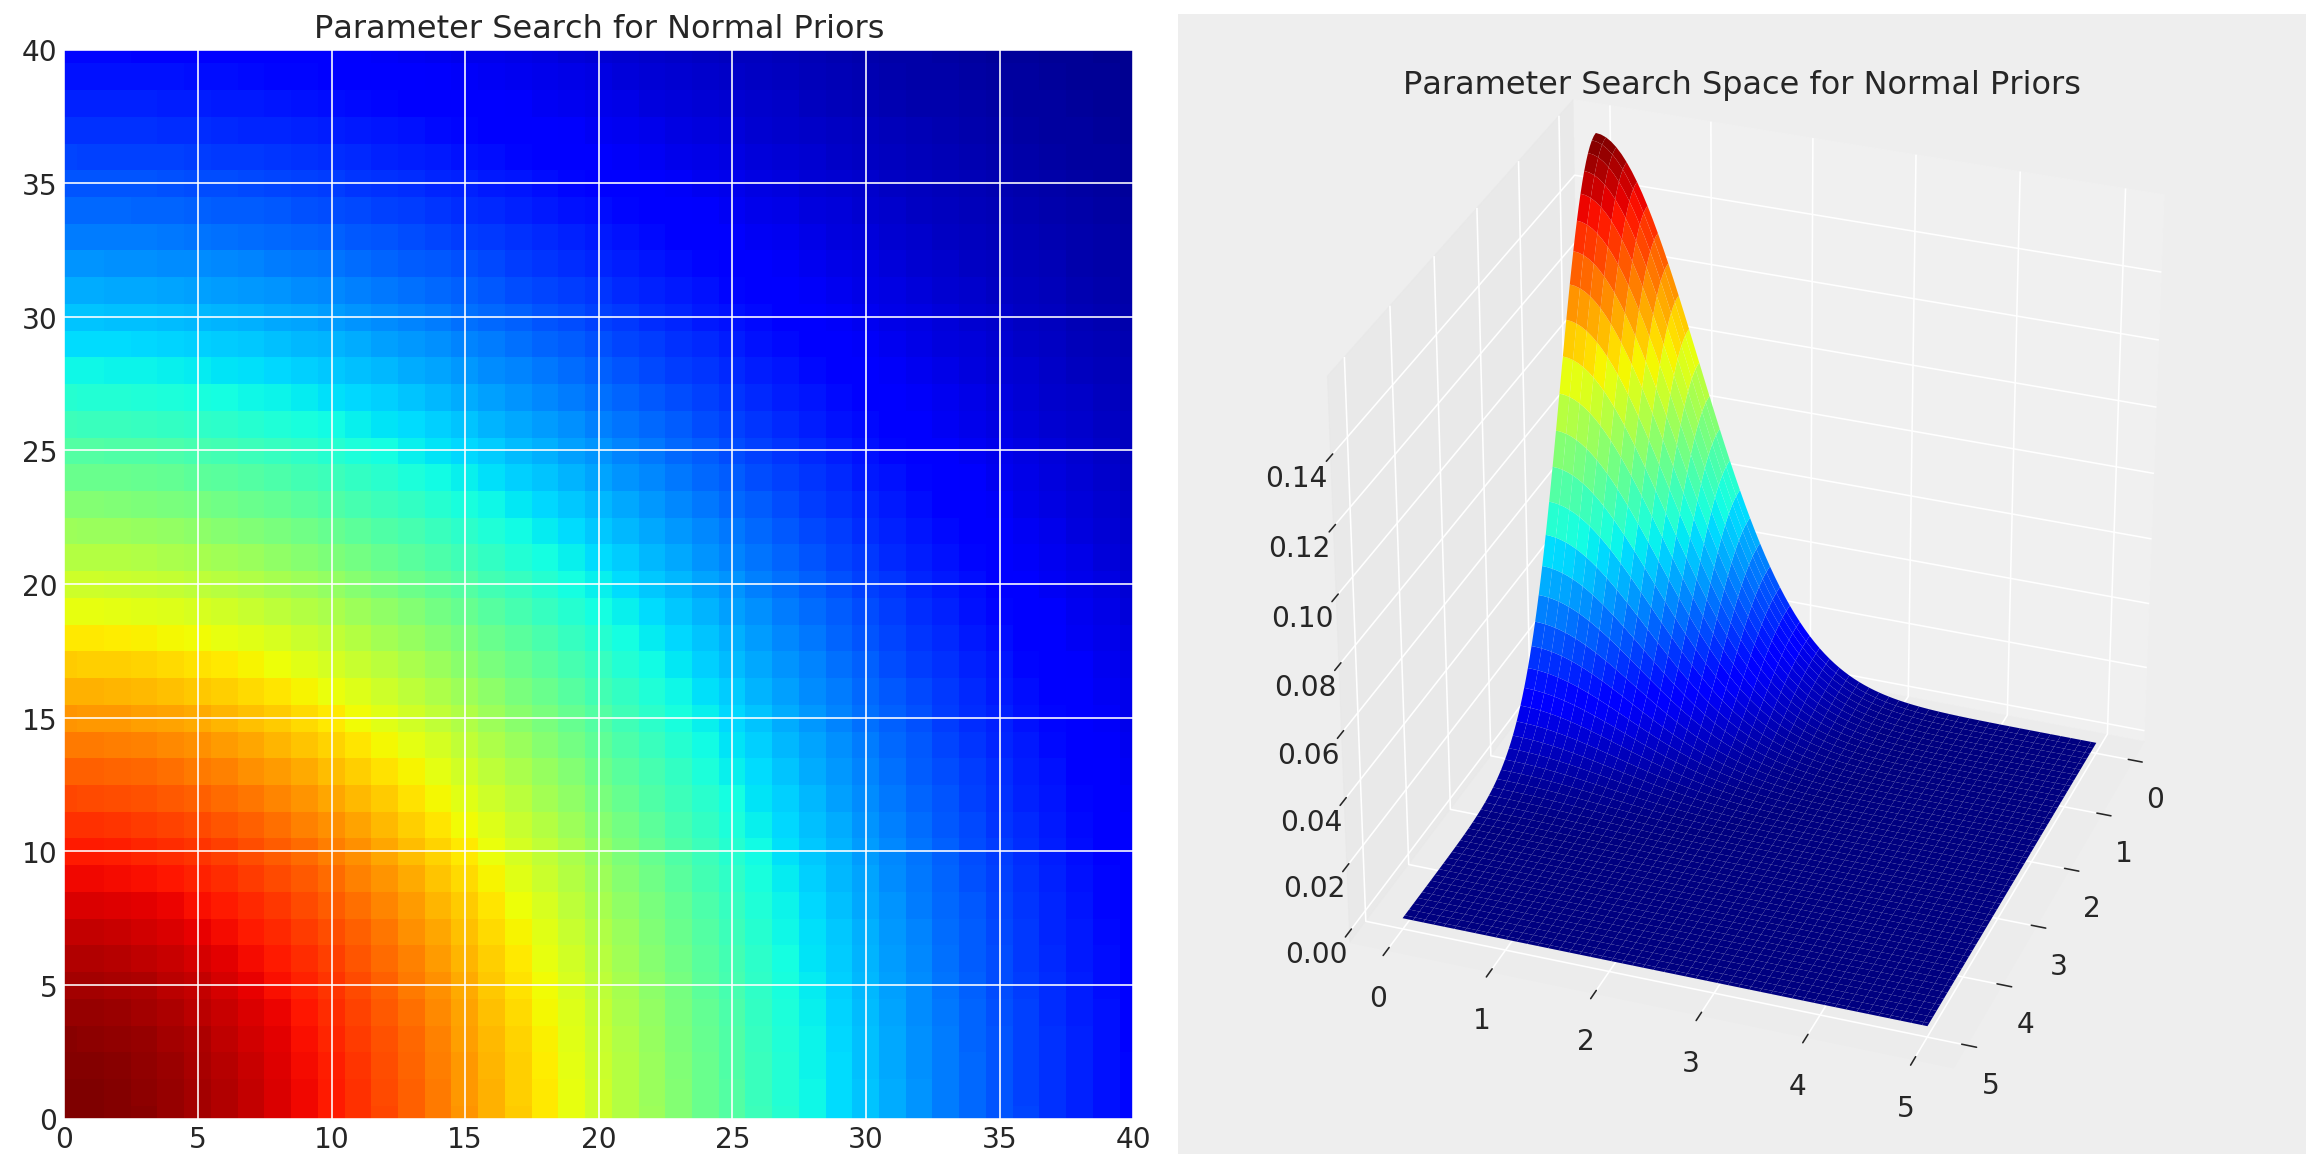

In [207]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np 
figsize(16, 8)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

jet =plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
norm_x = stats.norm.pdf(x, loc=0, scale=1)
norm_y = stats.norm.pdf(x, loc=0, scale =1)
M = np.dot(norm_x[:, None], norm_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet)

plt.xlim(0, 40)
plt.ylim(0, 40)
plt.title('Parameter Search for Normal Priors')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet)
ax.view_init(azim = 380)
plt.title('Parameter Search Space for Normal Priors')


- Note that we don't know the value of the conjugate prior parameters $\mu$ and $\tau$ for both the parameter $\beta$ and $\alpha$ we are trying to estimate. However when we initialize the model we can use $\mu=0$ and start with a large variance $\tau=0.05$. 
- The MCMC algorithms will sample values of $\mu$ and $\tau$ that will try to maximize the likelihood of $\alpha$ and $\beta$ given the data.

## Markov Chain Monte Carlo

Markov Chain Monte Carlo will draw samples of $\beta$ and $\alpha$, that are slightly dependent, and are approximately from a posterior distribution. At each iteration, an estimate is drawn from the prior for both parameters. If the parameters increases the probability of the data, the sample is accepted, otherwise it is rejected.
- Markov Chain means that the next state is only dependent on the current state.
- MCMC will return as many samples as we have specified in the step number, namely the trace. To find the most likely parameters one can take the sample mean.

- When modeling with MCMC, we usually reject the first iterations (burn-in). This is to make our draws closer to the stationary distribution and less dependent on the starting point. 
- There are methods to test the convergence of MCMC, the most used one is a lower autocorrelation of the samples.

## Posterior Probability of Sleep Given Time 
The logistic function describes the transition from awake to sleep but we need to estimate the parameteres $\beta$ and $\alpha$. The goal is to find the parameters of a logistic function which maximize the likelihood of the observed data. We assume a normal prior and use the MCMC algorithm to sample values of $\mu$ and $\tau$ for both $\alpha$ and $\beta$. The data is better modeled using a Bernoulli variable.

## Bernoulli Variable 
A Bernoulli variable is a discete random variable that is either 0 or 1. We can model the state asleep or awake as a Bernoulli variable where awake is 0 and asleep is 1. The Bernoulli variable for sleep depends on the time, in way given by the logistic function

$$ \text{Sleep Probability, $S_i$} \sim \text{Ber}( \;p(t_i)\; ), \;\; i=1..N$$

Therefore our target posterior distribution that we are trying to sample from is given as follows:

$$ P(\text{sleep} | t_i) = \text{Ber}(\frac{1}{1 + e^{(\beta t_i + \alpha)}})$$

## PyMC3 Model
- we are using PyMC3 which is a powerful Bayesian inference library
- The code below creates the model and performs MCMC, drawing N_SAMPLES number of samples for $\beta$ and $\alpha$. We choose the `Metropolis-Hastings` as the sampling approach. 

In [122]:
# sort the values by time offset 
sleep_data.sort_values('offset', inplace=True)

# time is time offset 
time = np.array(sleep_data.loc[:, 'offset'])

# Observations 
sleep_obs = np.array(sleep_data.loc[:, 'indicator'])

In [124]:
with pm.Model() as sleep_model:
    
    # Create the alpha and beta parameters
    alpha = pm.Normal('alpha', mu=0.0, tau=0.01, testval=0.0)
    beta = pm.Normal('beta', mu=0.0, tau=0.01, testval=0.0)
    
    # Create the probability from the logistic function
    p = pm.Deterministic('p', 1. / (1. + tt.exp(beta * time + alpha)))
    
    # Create the Bernoulli parameter which uses the observed data
    observed = pm.Bernoulli('obs', p, observed=sleep_obs)
    
    # Use Metropolis-Hastings sampling
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling methods
    sleep_trace = pm.sample(N_SAMPLES, step=step)
    

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 50 seconds.
The number of effective samples is smaller than 10% for some parameters.


The trace varibale contains all the samples drawn from the posterior distribution of $\beta$ and $\alpha$. MCMC chain converges to the target distribution as the number of samples increases. Consequently the later drawn values are more likely to represent the true value of the estimated parameters.

## Visualize Posterior for $\beta$ and $\alpha$
It is possible to visuailze the chain of generated samples by using a histogram.

In [127]:
# Get the values of beta and alpha samples 
alpha_samples = sleep_trace["alpha"][5000:, None]
beta_samples = sleep_trace["beta"][5000:, None]

/Users/obara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  app.launch_new_instance()


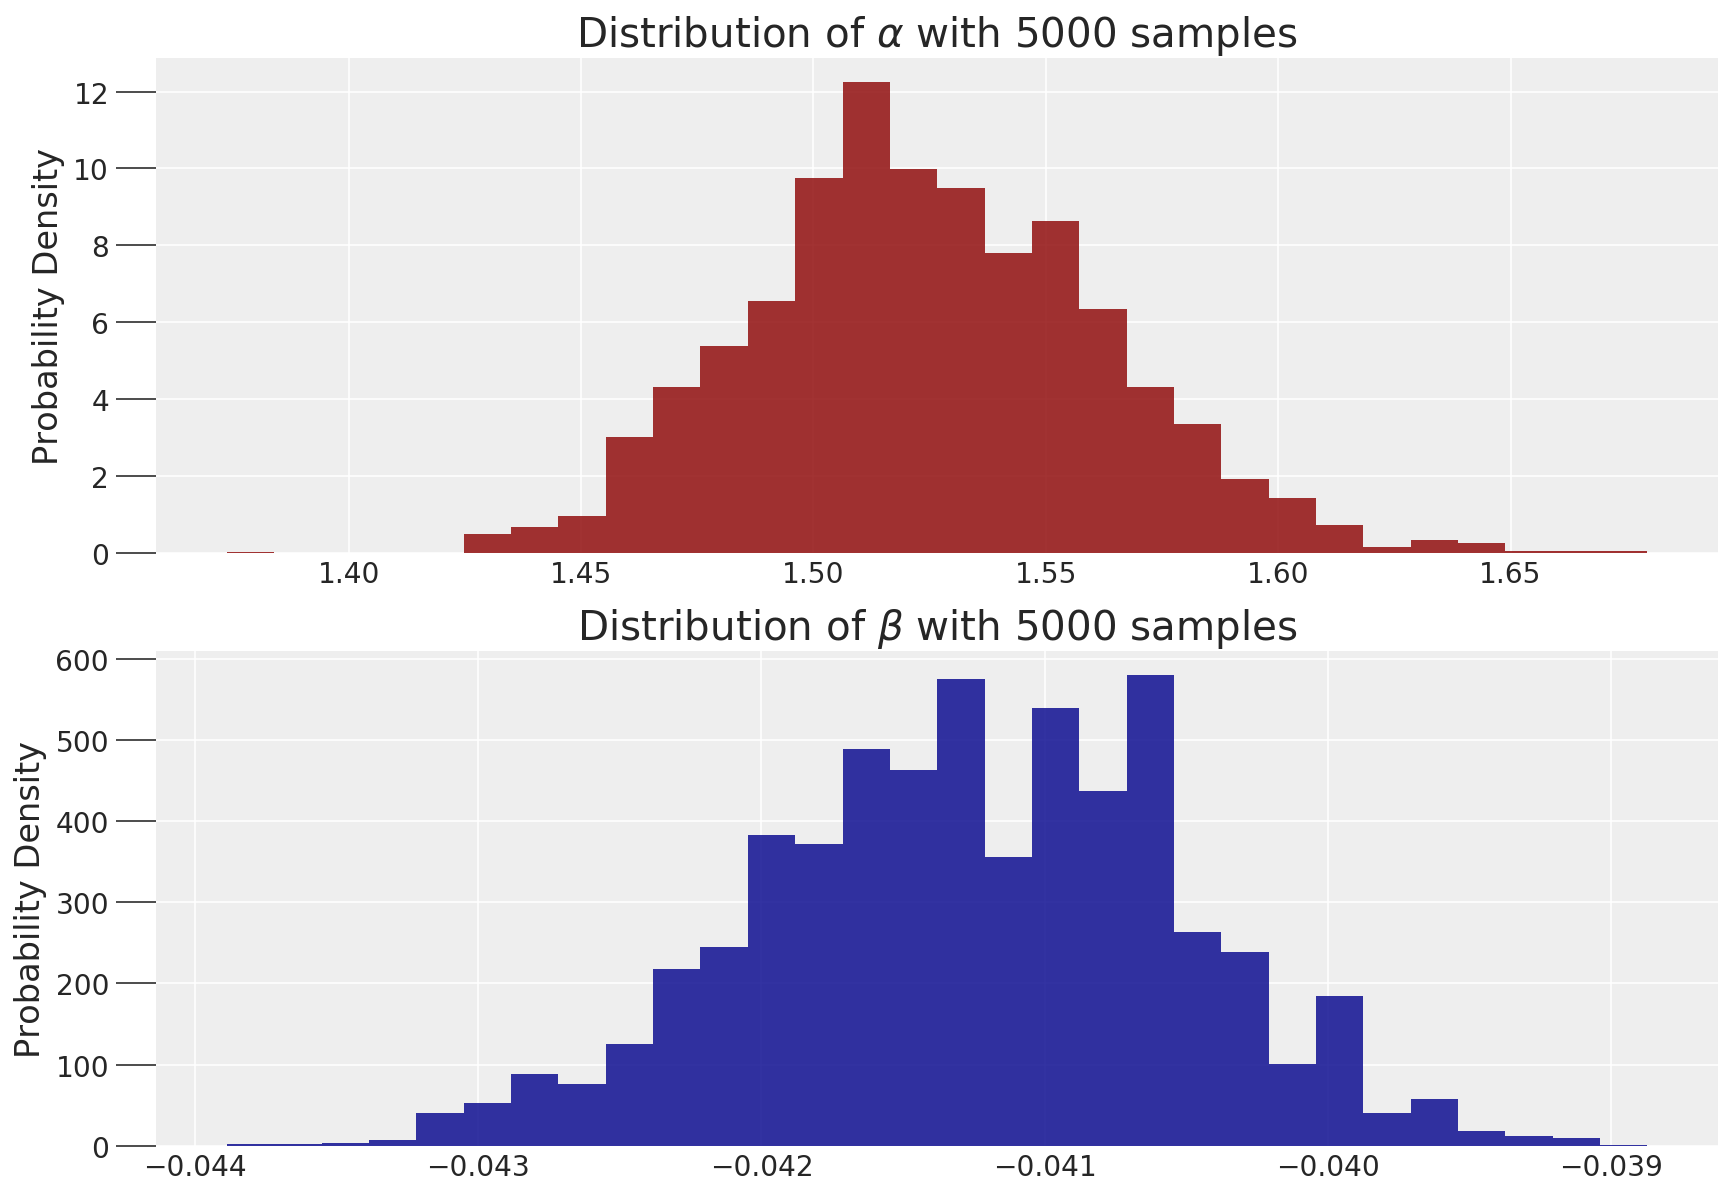

In [220]:
figsize(14, 10)

plt.subplot(211)
plt.title(r"Distribution of $\alpha$ with %d samples" % N_SAMPLES)

plt.hist(alpha_samples, histtype='stepfilled', 
         color = 'darkred', bins=30, alpha=0.8, density=True);
plt.ylabel('Probability Density')


plt.subplot(212)
plt.title(r"""Distribution of $\beta$ with %d samples""" % N_SAMPLES)
plt.hist(beta_samples, histtype='stepfilled', 
         color = 'darkblue', bins=30, alpha=0.8, density=True)
plt.ylabel('Probability Density');
plt.subplots_adjust()

## Posterior for Sleep Visualisation 

In [135]:
# Time values for probability prediction 
time_est = np.linspace(time.min()-15, time.max() + 15, 1e3)[:,None]

# Extract the mean value for the parameters 
alpha_est = alpha_samples.mean()
beta_est = beta_samples.mean()

# Probability at each time using eman values of alpha and beta
sleep_est = logistic(time_est, beta=beta_est, alpha=alpha_est)

/Users/obara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


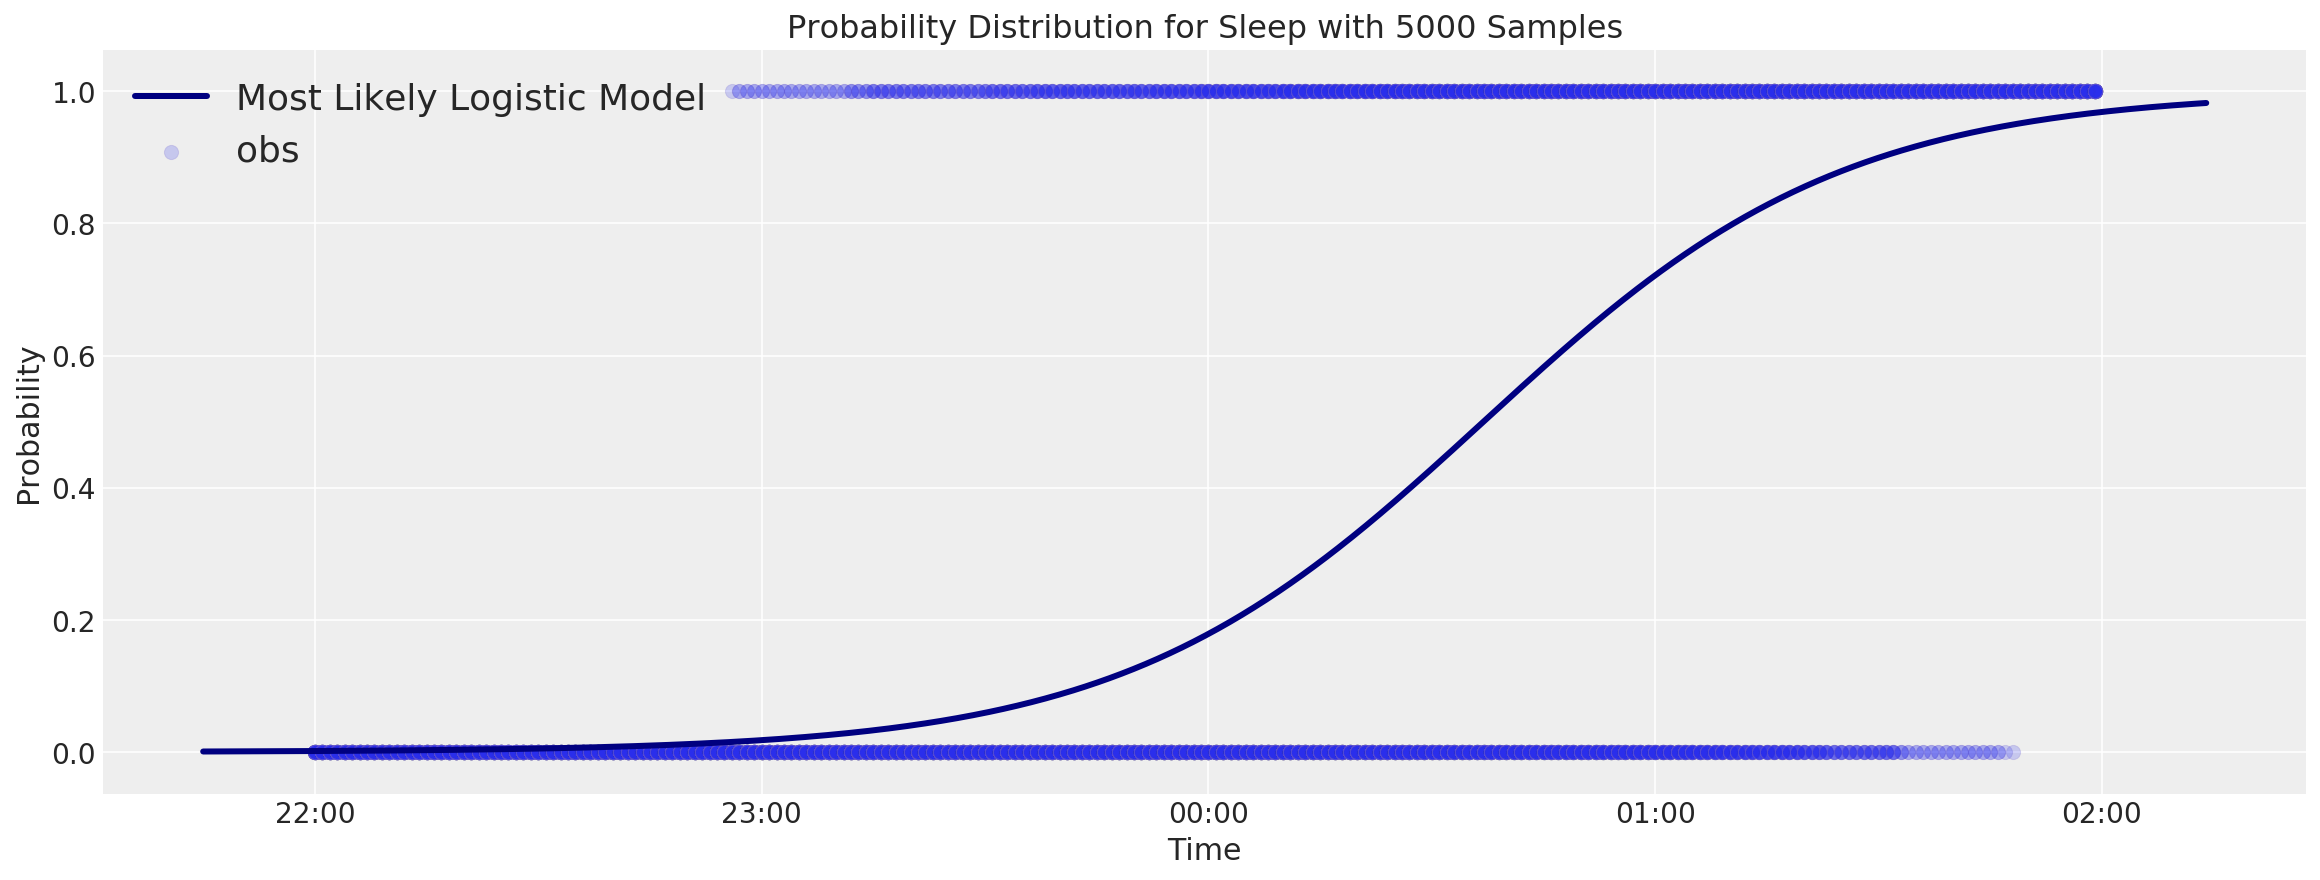

In [209]:
figsize(16, 6)

plt.plot(time_est, sleep_est, color = 'navy', 
         lw=3, label="Most Likely Logistic Model")
plt.scatter(time, sleep_obs, edgecolor = 'slateblue',
            s=50, alpha=0.2, label='obs')
plt.title('Probability Distribution for Sleep with %d Samples' % N_SAMPLES);
plt.legend(prop={'size':18})
plt.ylabel('Probability')
plt.xlabel('Time');
# plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);
plt.xticks([-120, -60, 0, 60, 120], sleep_labels);

The posterior probability increases from 0 to 1 as the time gets later. 

In [278]:
print('The probability of sleep increases to above 50% at 00:{} .'.format(int(time_est[np.where(sleep_est > 0.5)][0])))

The probability of sleep increases to above 50% at 00:37 .


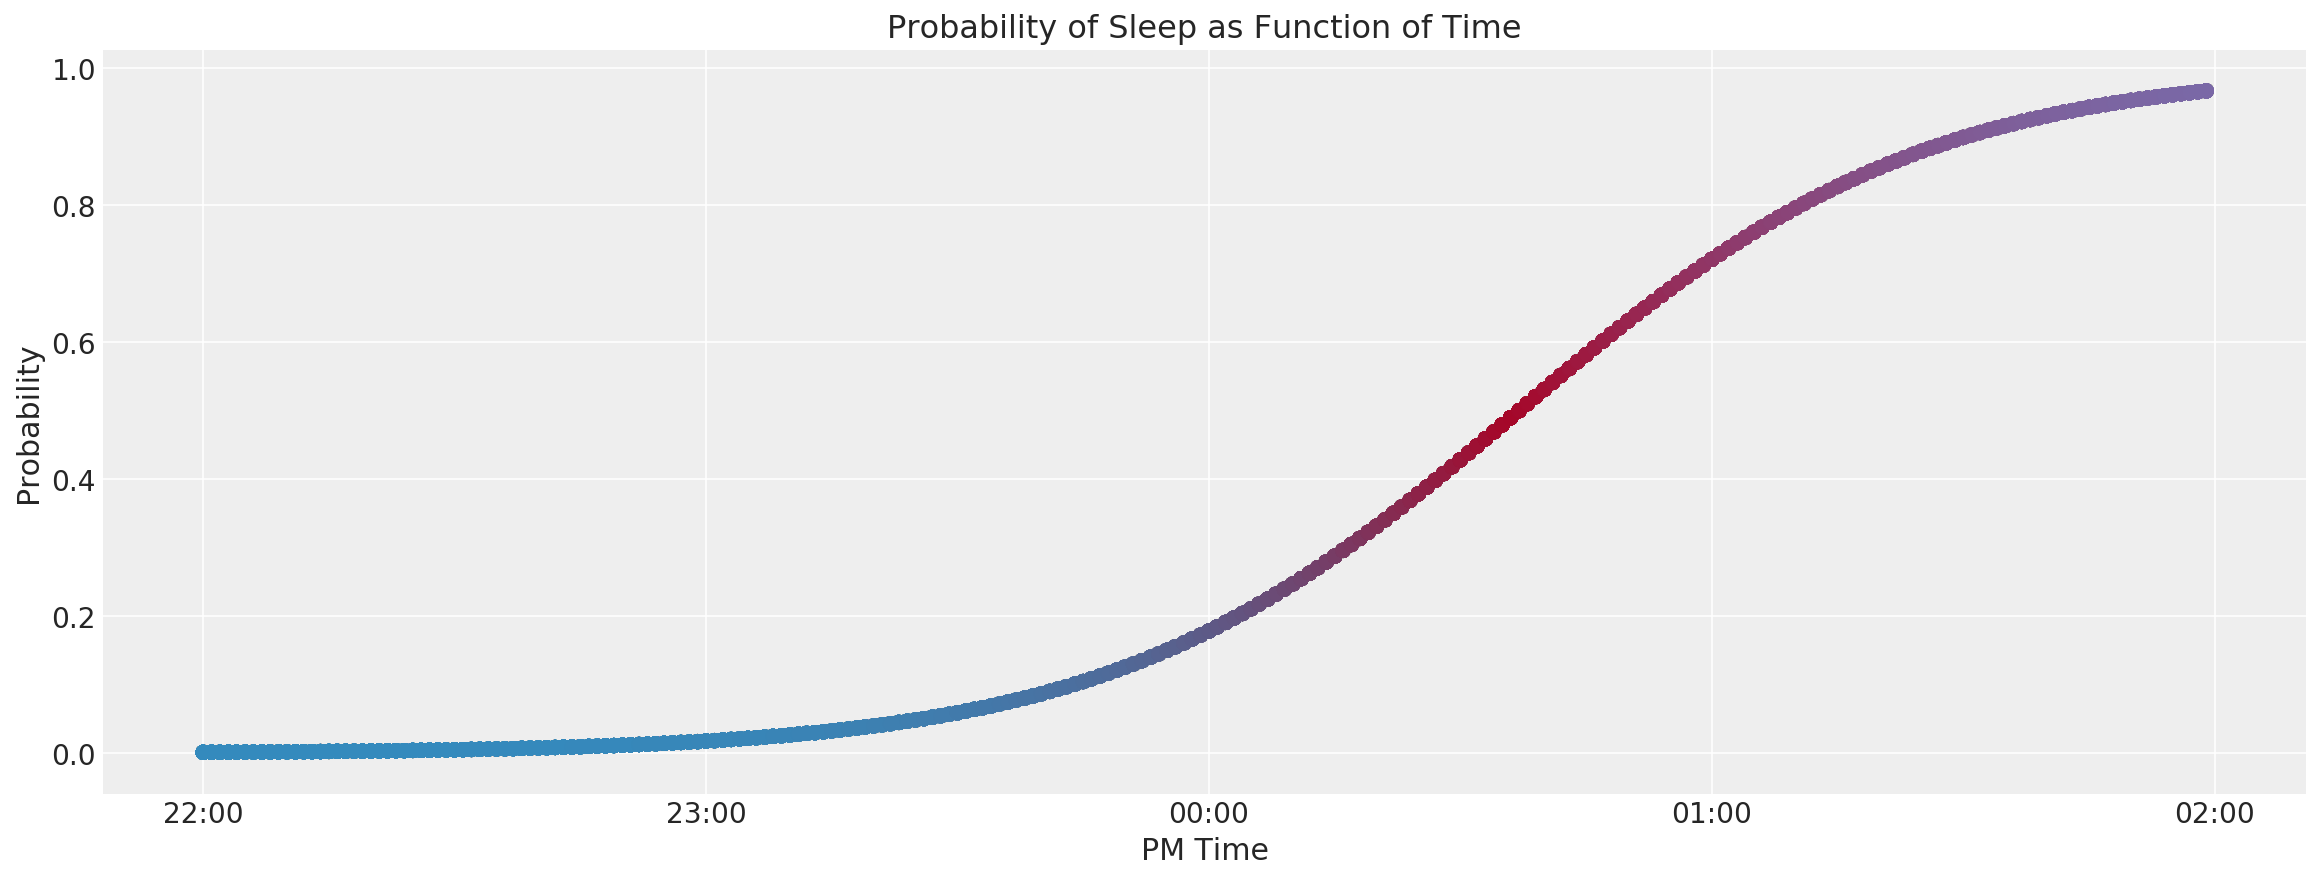

In [210]:
colors = ["#348ABD", "#A60628", "#7A68A6"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("BMH", colors)

figsize(16, 6)
probs = sleep_trace['p']

plt.scatter(time, probs.mean(axis=0), cmap = cmap, 
            c = probs.mean(axis=0), s = 50);
plt.title('Probability of Sleep as Function of Time');
plt.xlabel('PM Time');
plt.ylabel('Probability');
plt.xticks([-120, -60, 0, 60, 120], sleep_labels);


## Use the Posterior to get some insight

In [188]:
print('00:00  probability of being asleep: {:.2f}%.'.
      format(100 * logistic(0, beta_est, alpha_est)))
print('23:00   probability of being asleep: {:.2f}%.'.
      format(100 * logistic(-60, beta_est, alpha_est)))
print('01:00  probability of being asleep: {:.2f}%.'.
      format(100 * logistic(60, beta_est, alpha_est)))

00:00  probability of being asleep: 17.88%.
23:00   probability of being asleep: 1.80%.
01:00  probability of being asleep: 72.13%.


## Posterior Probability Distribution for Specific Time 

In [195]:
def sleep_posterior(time_offset, time):
    figsize(16, 8)
    prob = logistic(time_offset, beta_samples, alpha_samples)
    plt.hist(prob, bins=100, histtype='step', lw=4)
    plt.title('Probability Distribution for Sleep at %s PM' % time)
    plt.xlabel('Probability of Sleep'); plt.ylabel('Samples')
    plt.show();

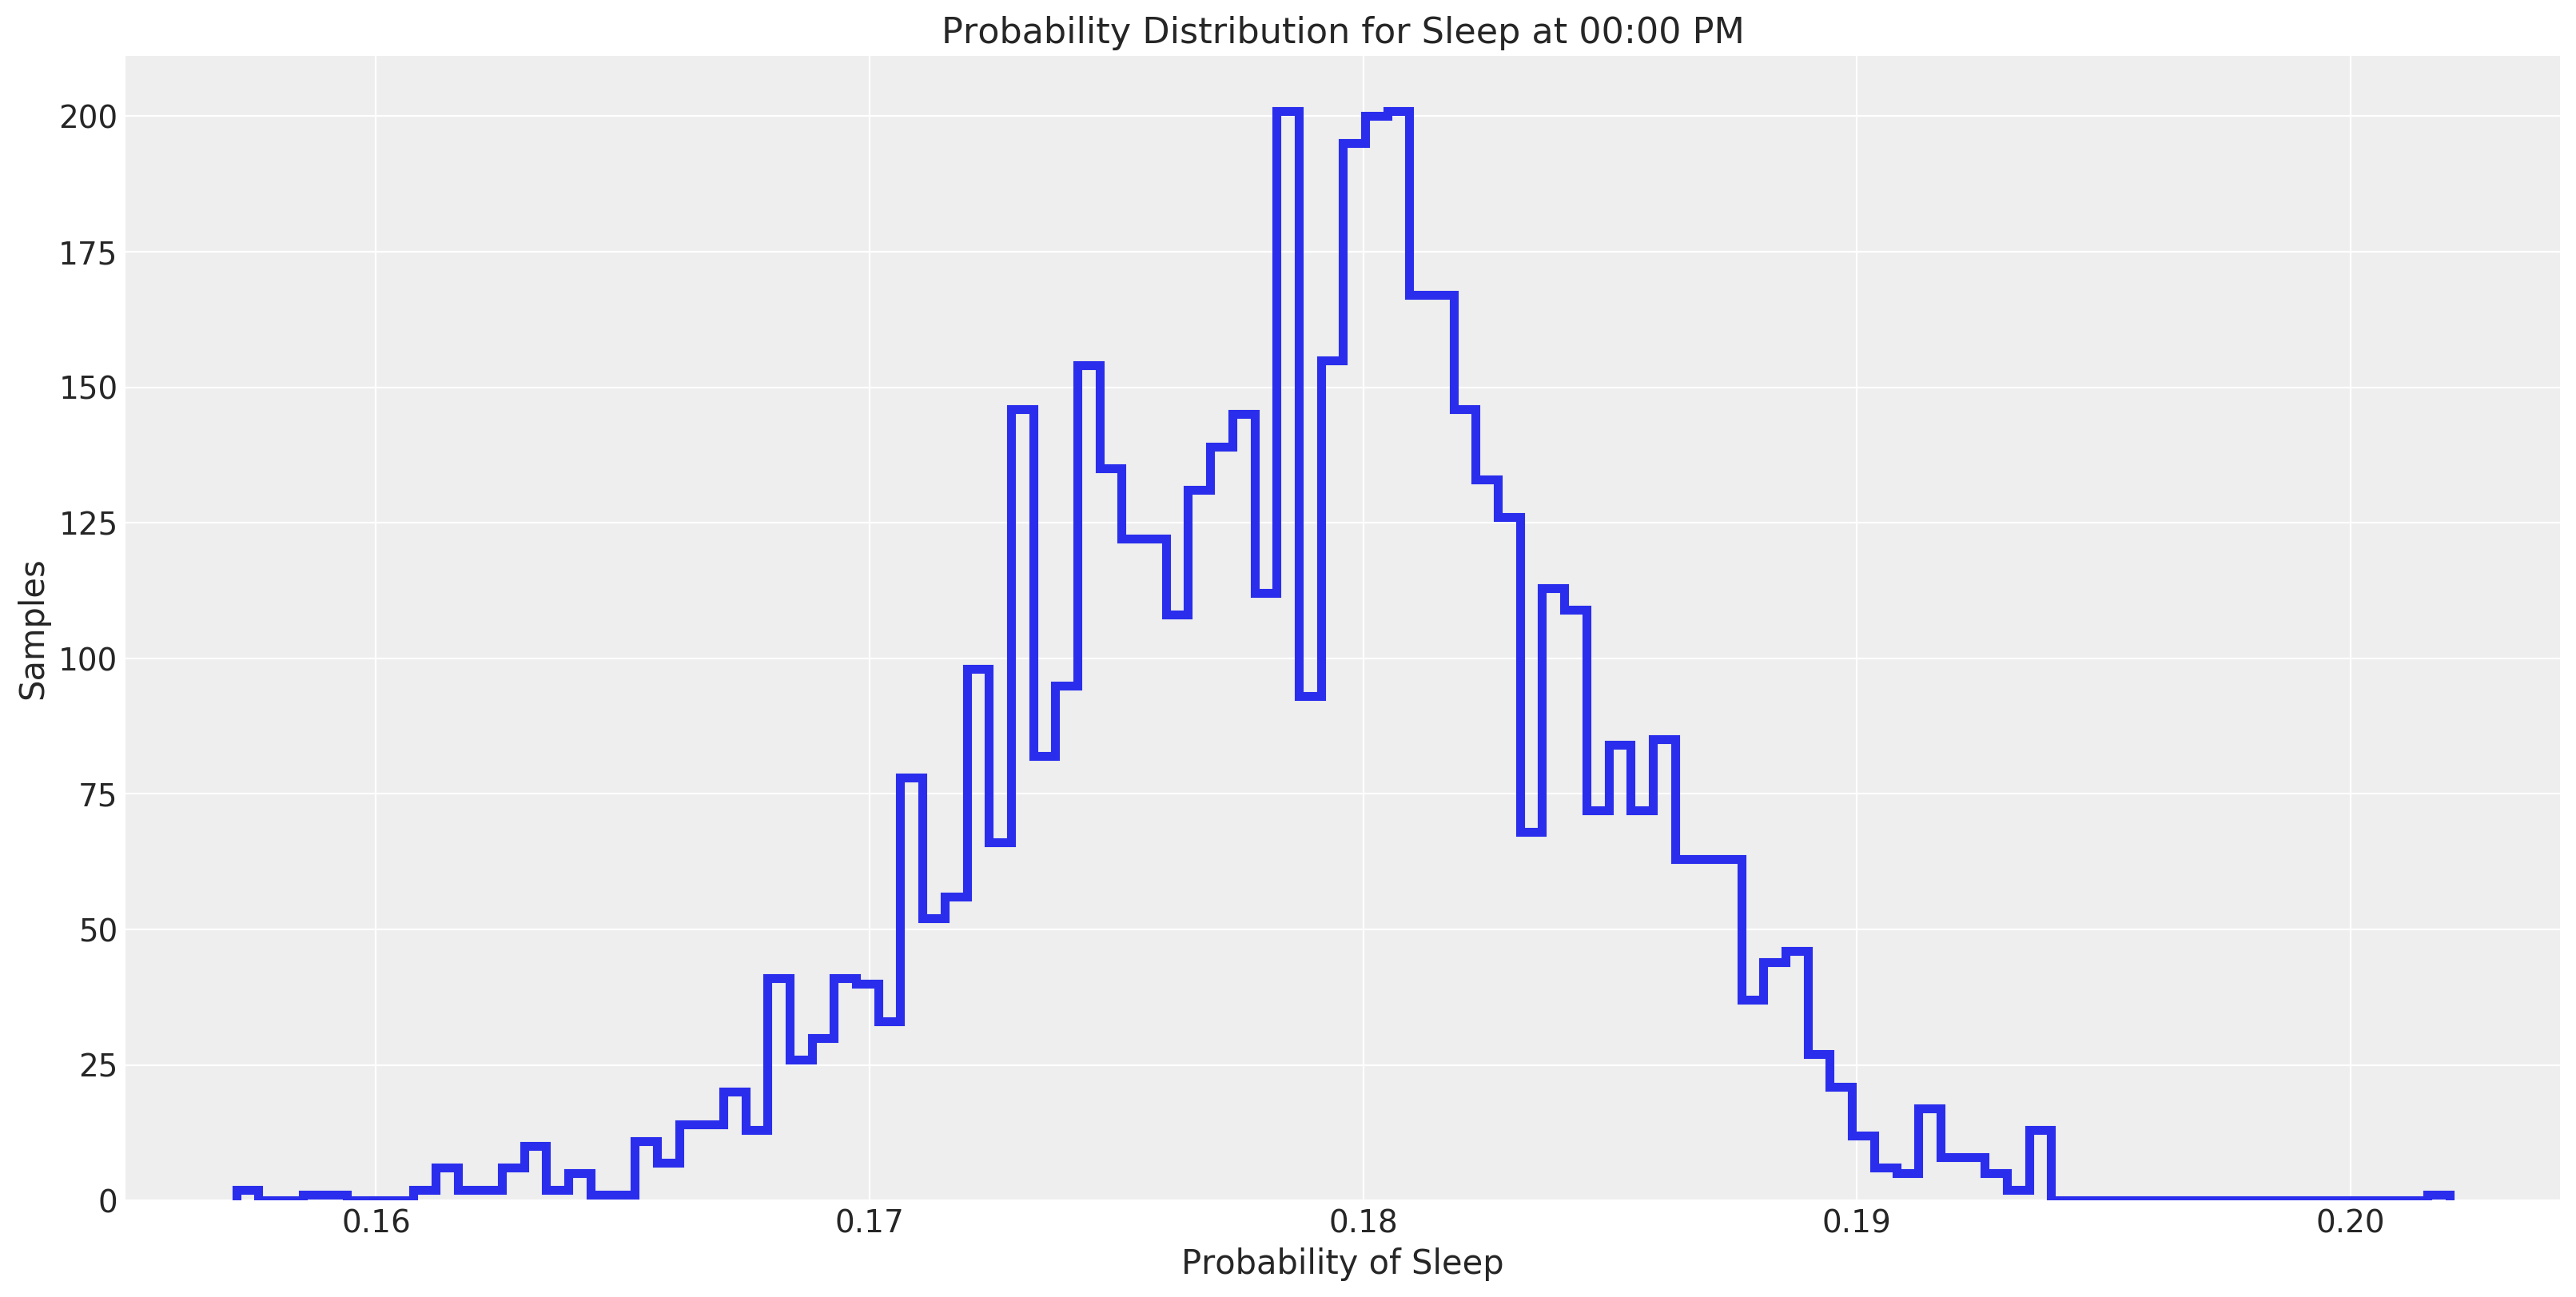

In [202]:
sleep_posterior(0, '00:00')

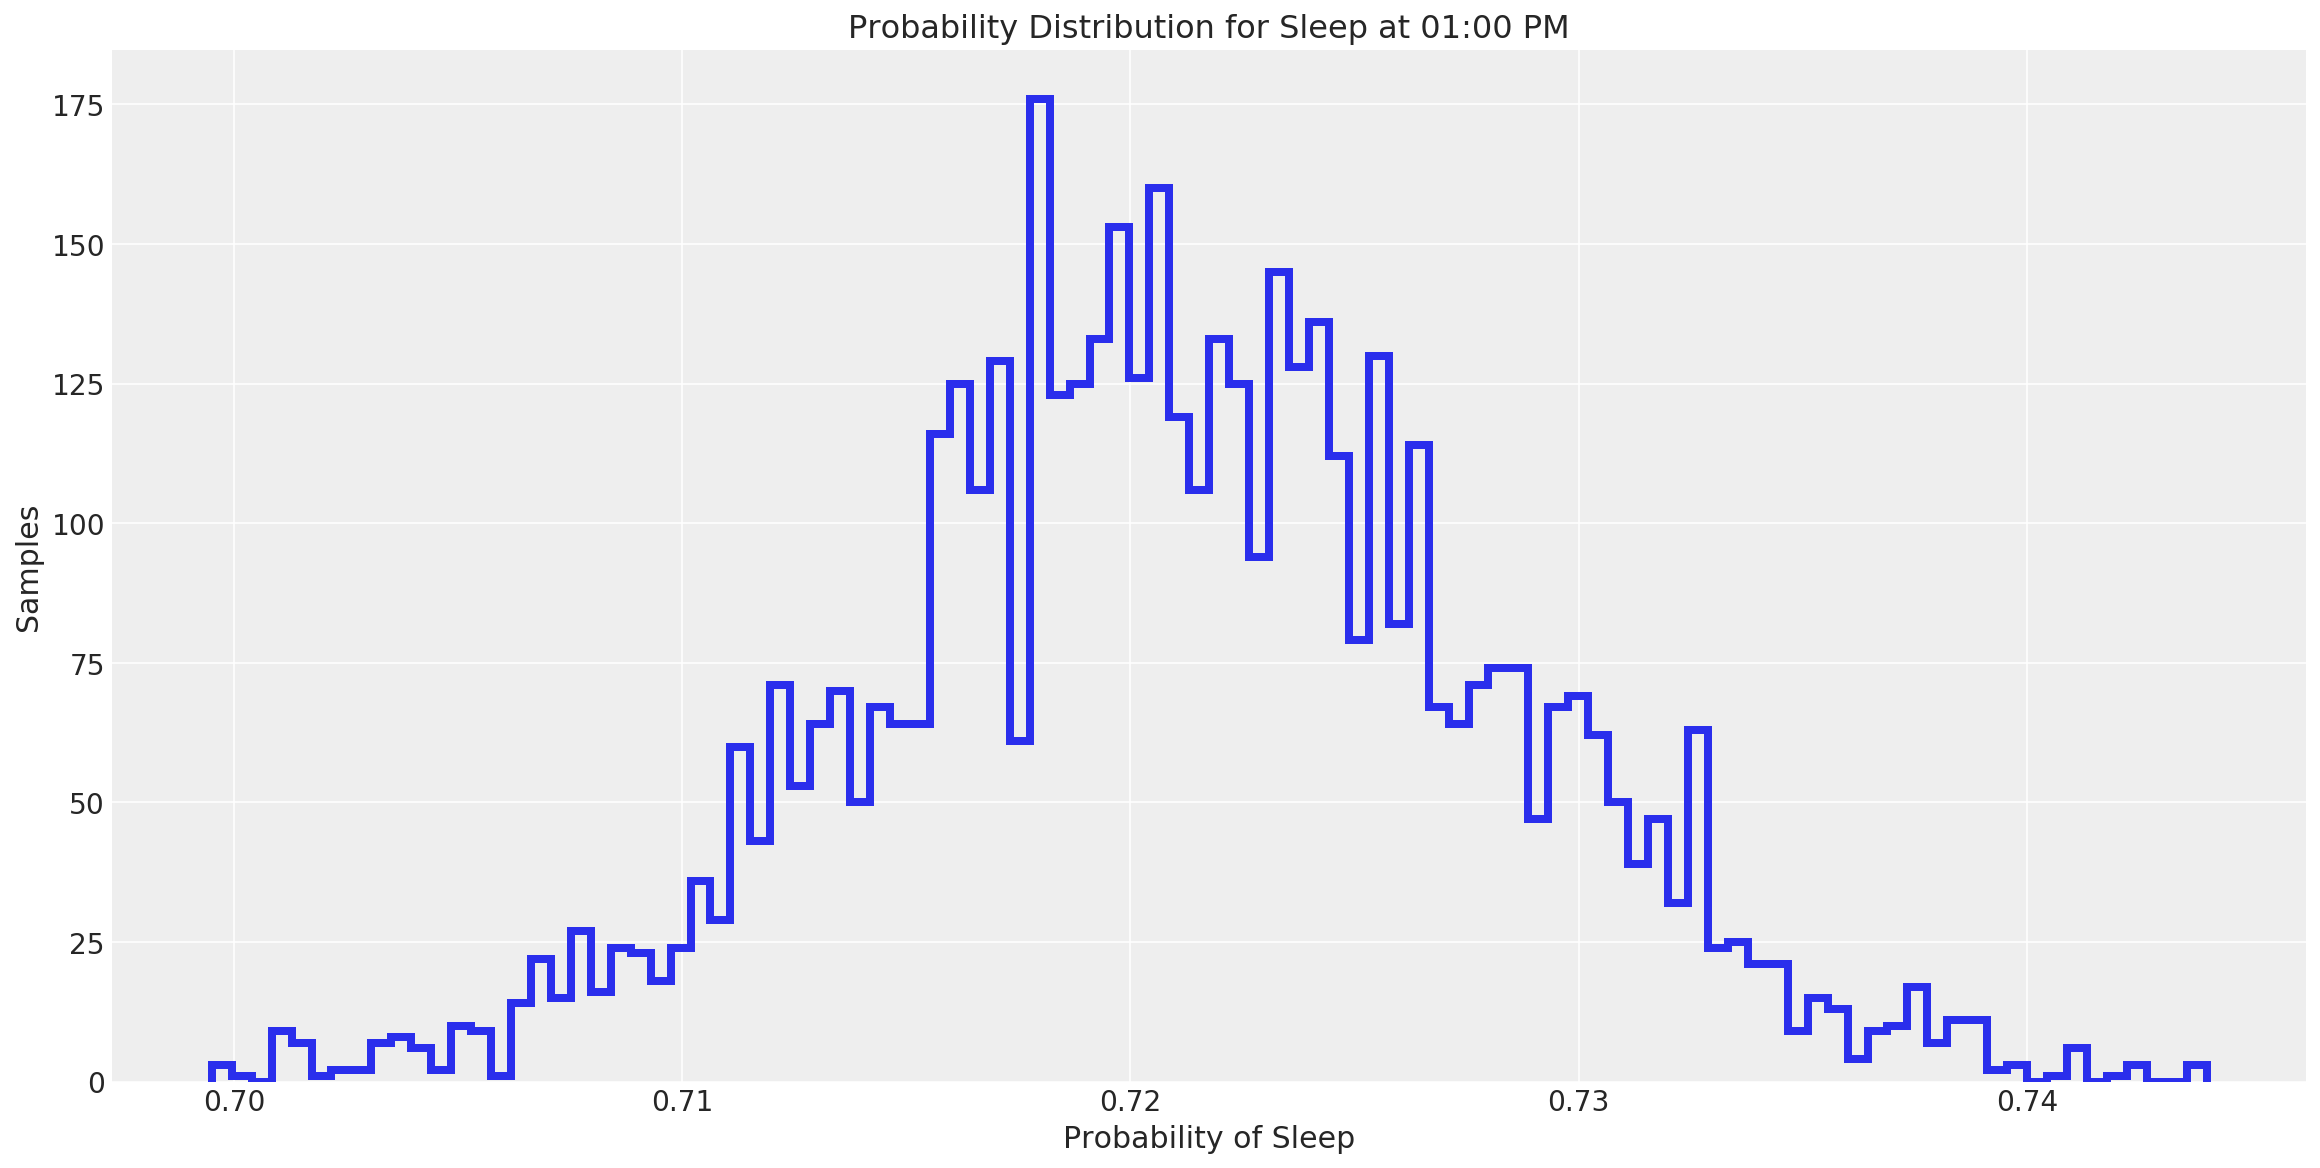

In [211]:
sleep_posterior(60, '01:00')

## Trace Plots

/Users/obara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  


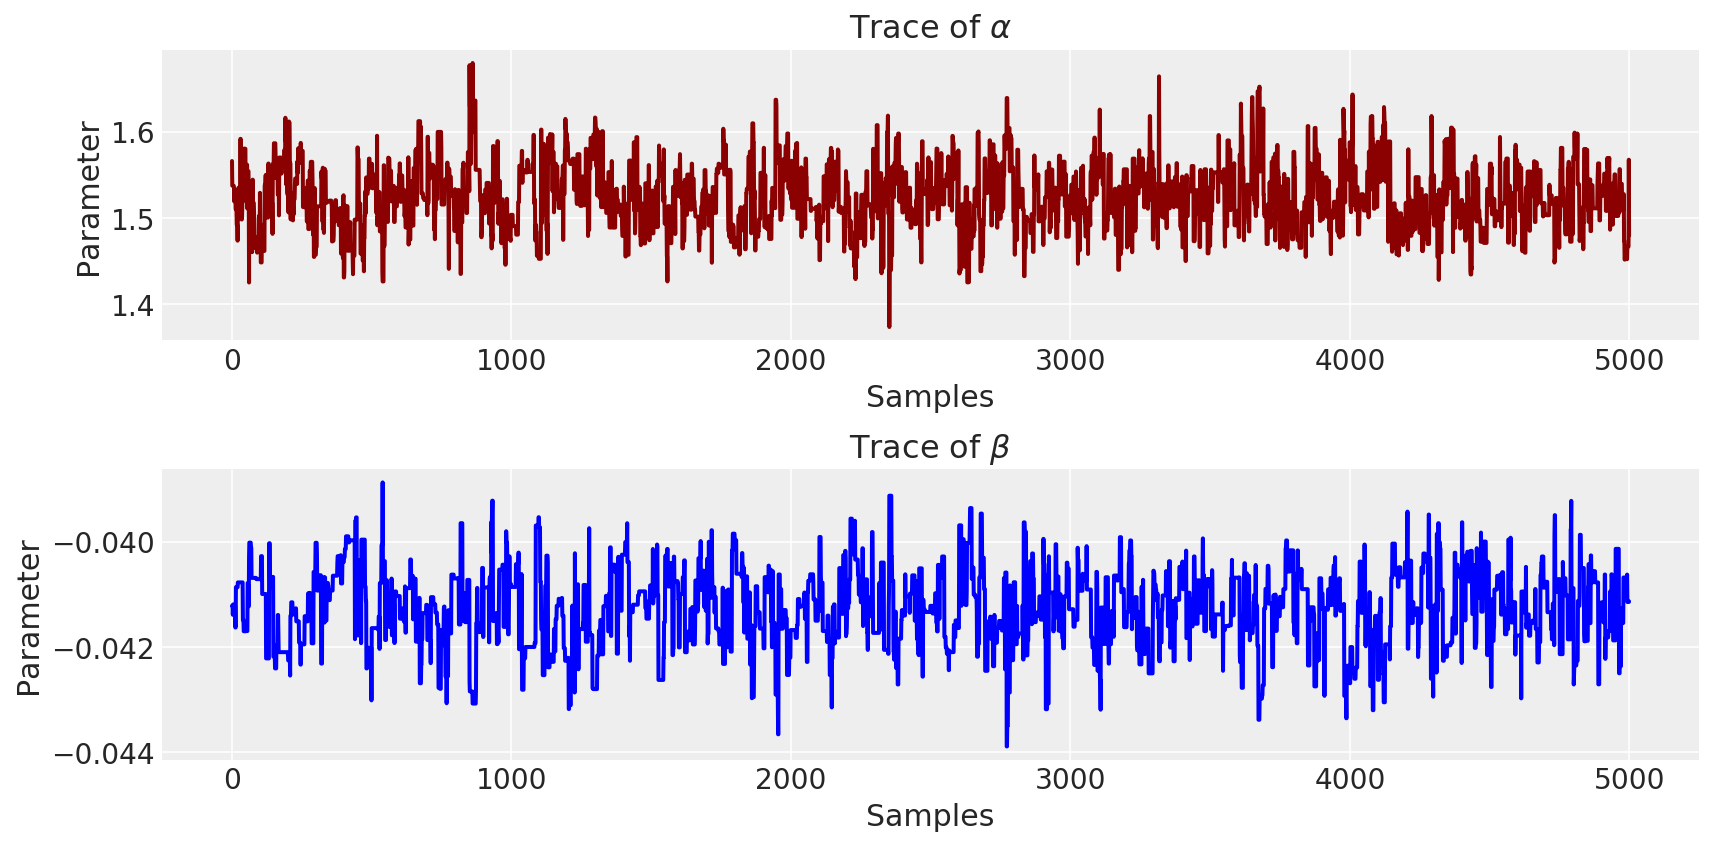

In [212]:
figsize(12, 6)

# Plot alpha trace
plt.subplot(211)
plt.title(r'Trace of $\alpha$')
plt.plot(alpha_samples, color = 'darkred')
plt.xlabel('Samples'); plt.ylabel('Parameter');

# Plot beta trace
plt.subplot(212)
plt.title(r'Trace of $\beta$')
plt.plot(beta_samples, color='b')
plt.xlabel('Samples'); plt.ylabel('Parameter');
plt.tight_layout(h_pad=0.8)

## Diagnostic
Recent version of PyMC3 now dedicate visualization diagnostic tests to Rvis library.


/Users/obara/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


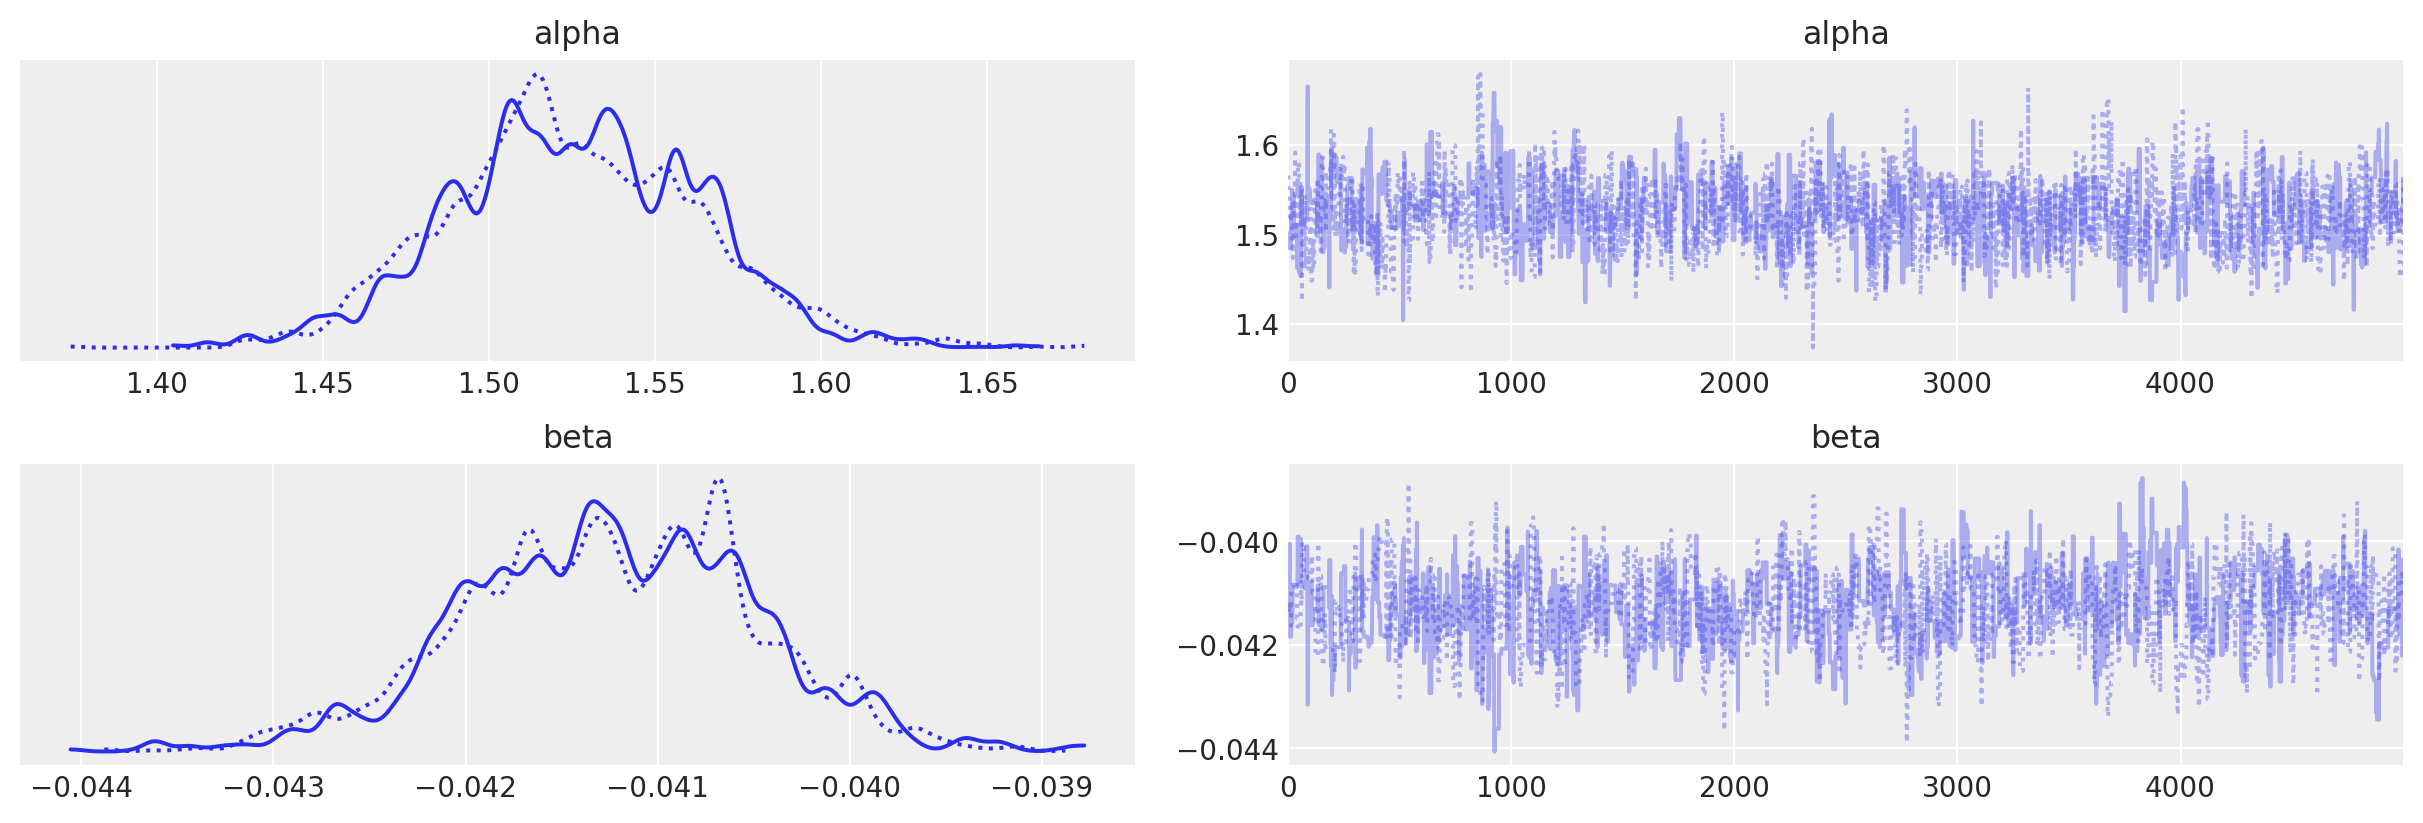

In [201]:
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

figsize(12, 6)
az.plot_trace(sleep_trace, ['alpha', 'beta']);
# pm.traceplot(sleep_trace, ['alpha', 'beta']);

/Users/obara/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


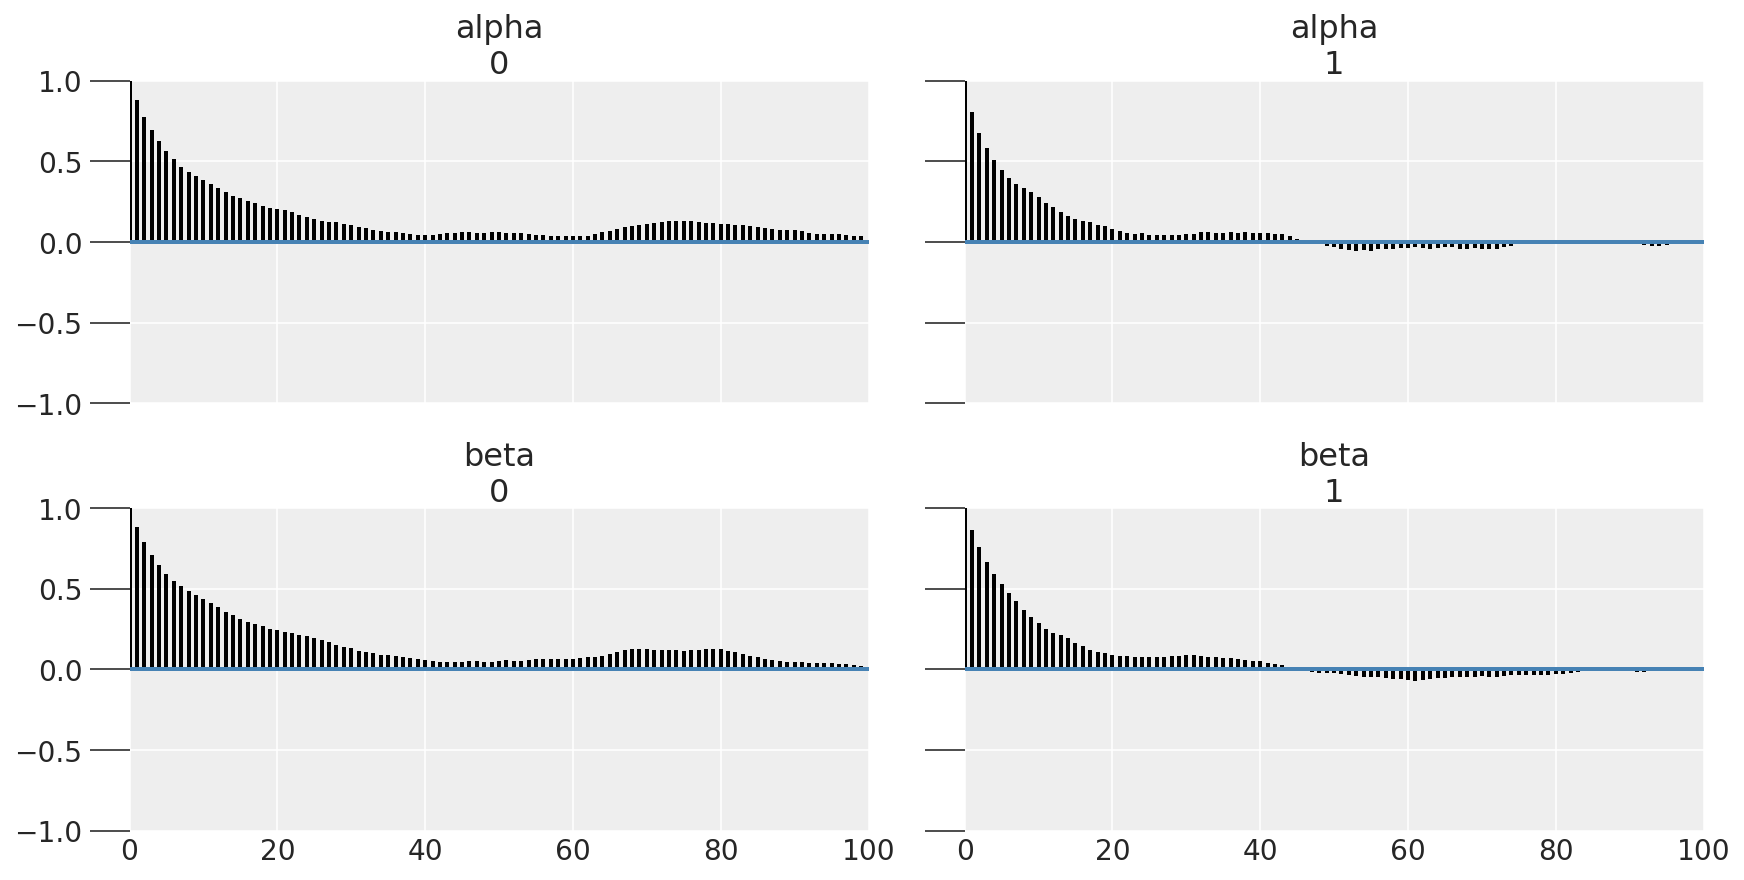

In [224]:
az.plot_autocorr(sleep_trace, ['alpha', 'beta'], figsize=(12,6),grid=(2,2) );

## Wake Model 

In [225]:
# Sort the values by time offset
wake_data.sort_values('offset', inplace=True)

# Time is the time offset
time = np.array(wake_data.loc[:, 'offset'])

# Observations are the indicator
wake_obs = np.array(wake_data.loc[:, 'indicator'])

with pm.Model() as wake_model:
    # Create the alpha and beta parameters
    alpha = pm.Normal('alpha', mu=0.0, tau=0.01, testval=0.0)
    beta = pm.Normal('beta', mu=0.0, tau=0.01, testval=0.0)
    
    # Create the probability from the logistic function
    p = pm.Deterministic('p', 1. / (1. + tt.exp(beta * time + alpha)))
    
    # Create the bernoulli parameter which uses the observed data
    observed = pm.Bernoulli('obs', p, observed=wake_obs)
    
    # Starting values are found through Maximum A Posterior estimation
    # start = pm.find_MAP()
    
    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    wake_trace = pm.sample(N_SAMPLES, step=step);

/Users/obara/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 47 seconds.
The number of effective samples is smaller than 10% for some parameters.


/Users/obara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


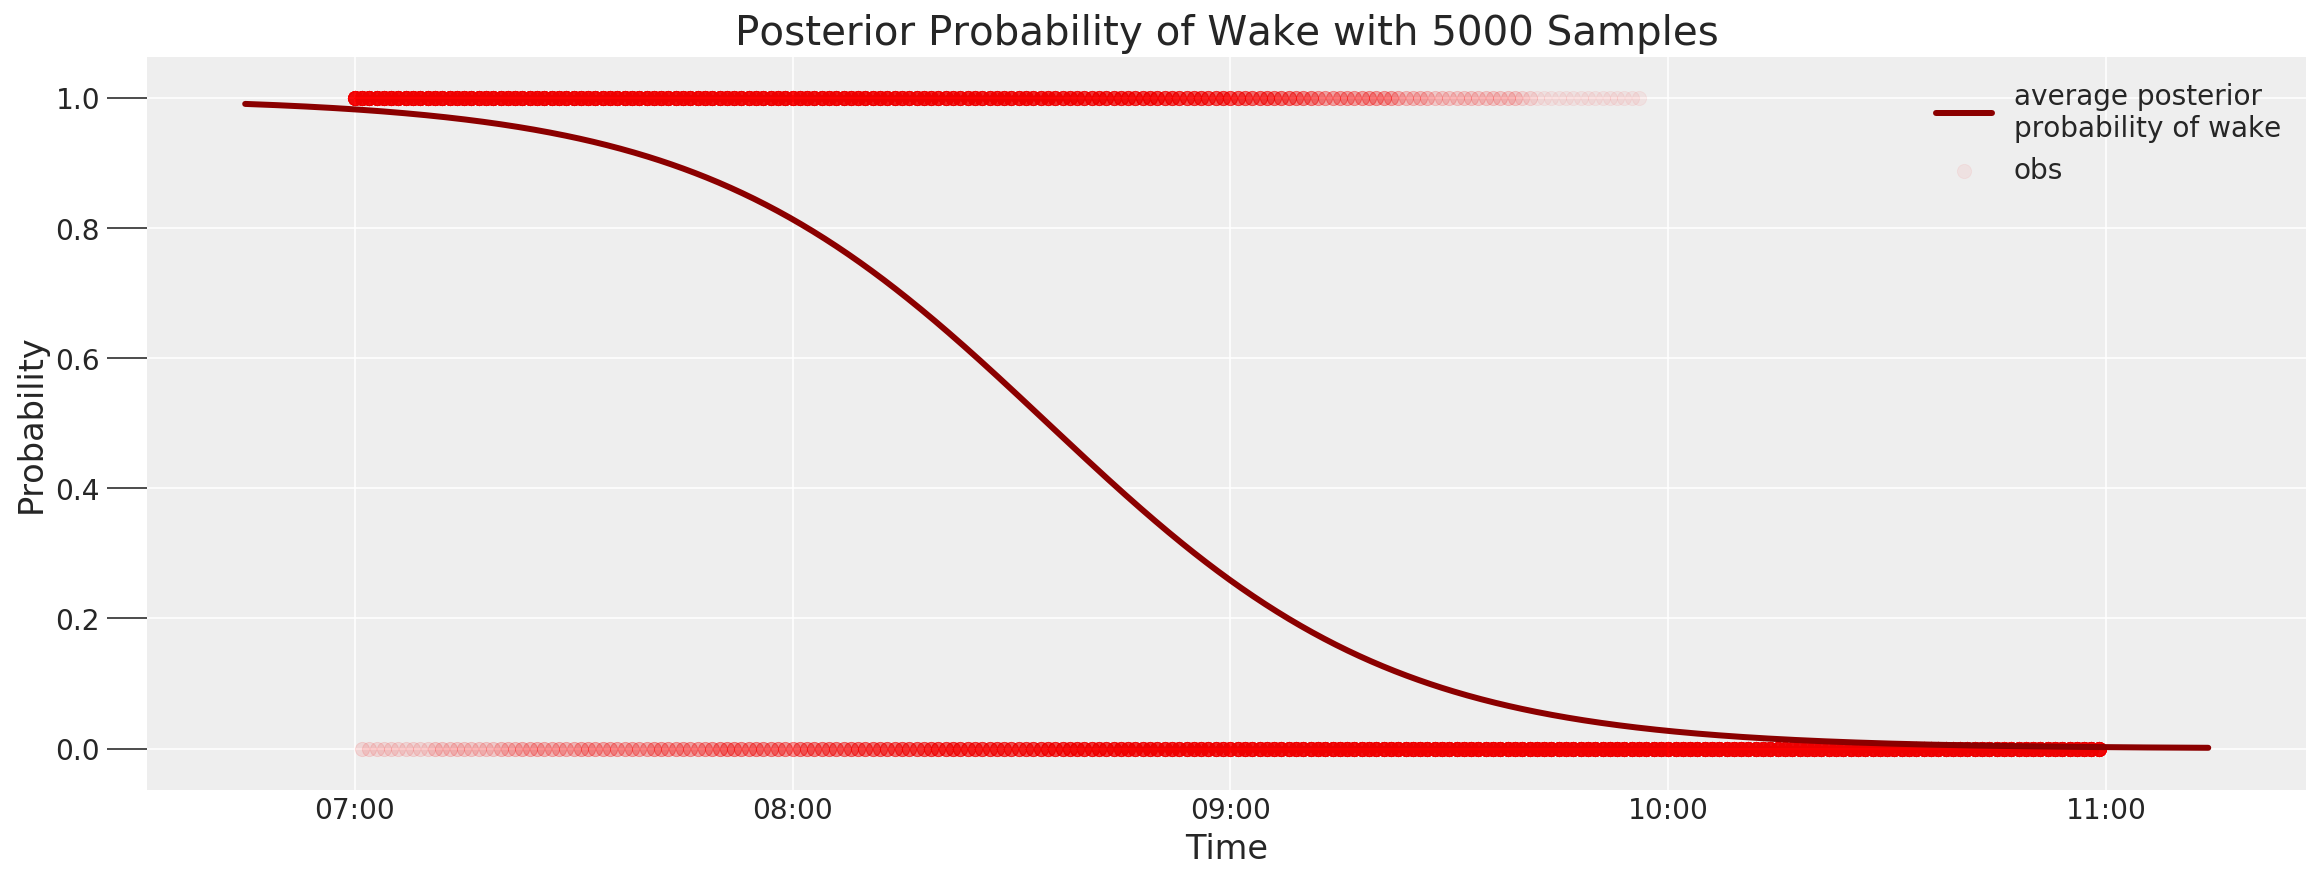

In [229]:
# Extract the alpha and beta samples
alpha_samples = wake_trace["alpha"][5000:, None]
beta_samples = wake_trace["beta"][5000:, None]

# Time values for probability prediction
time_est = np.linspace(time.min()- 15, time.max() + 15, 1e3)[:, None]

# Take most likely parameters to be mean values
alpha_est = alpha_samples.mean()
beta_est = beta_samples.mean()

# Probability at each time using mean values of alpha and beta
wake_est = logistic(time_est, beta=beta_est, alpha=alpha_est)

figsize(16, 6)

plt.plot(time_est, wake_est, color = 'darkred', 
         lw=3, label="average posterior \nprobability of wake")
plt.scatter(time, wake_obs, edgecolor = 'r', facecolor = 'r', 
            s=50, alpha=0.05, label='obs')
plt.title('Posterior Probability of Wake with %d Samples' % N_SAMPLES);
plt.legend(prop={'size':14})
plt.ylabel('Probability')
plt.xlabel('Time');
plt.xticks([-120, -60, 0, 60, 120], wake_labels);

In [272]:
print('The probability of being awake passes 50% at 9:{} AM.'.format(int(time_est[np.where(wake_est < 0.5)][0])))

The probability of being awake passes 50% at 9:-24 AM.


In [249]:
print('Probability of being awake at 8:30 AM: {:.2f}%.'.
      format(100 - (100 * logistic(-30, beta=beta_est, alpha=alpha_est))))
print('Probability of being awake at 9:00 AM: {:.2f}%.'.
      format(100 - (100 * logistic(0, beta=beta_est, alpha=alpha_est))))
print('Probability of being awake at 9:30 AM: {:.2f}%.'.
      format(100 - (100 * logistic(30, beta=beta_est, alpha=alpha_est))))

Probability of being awake at 8:30 AM: 44.81%.
Probability of being awake at 9:00 AM: 74.15%.
Probability of being awake at 9:30 AM: 91.02%.


/Users/obara/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


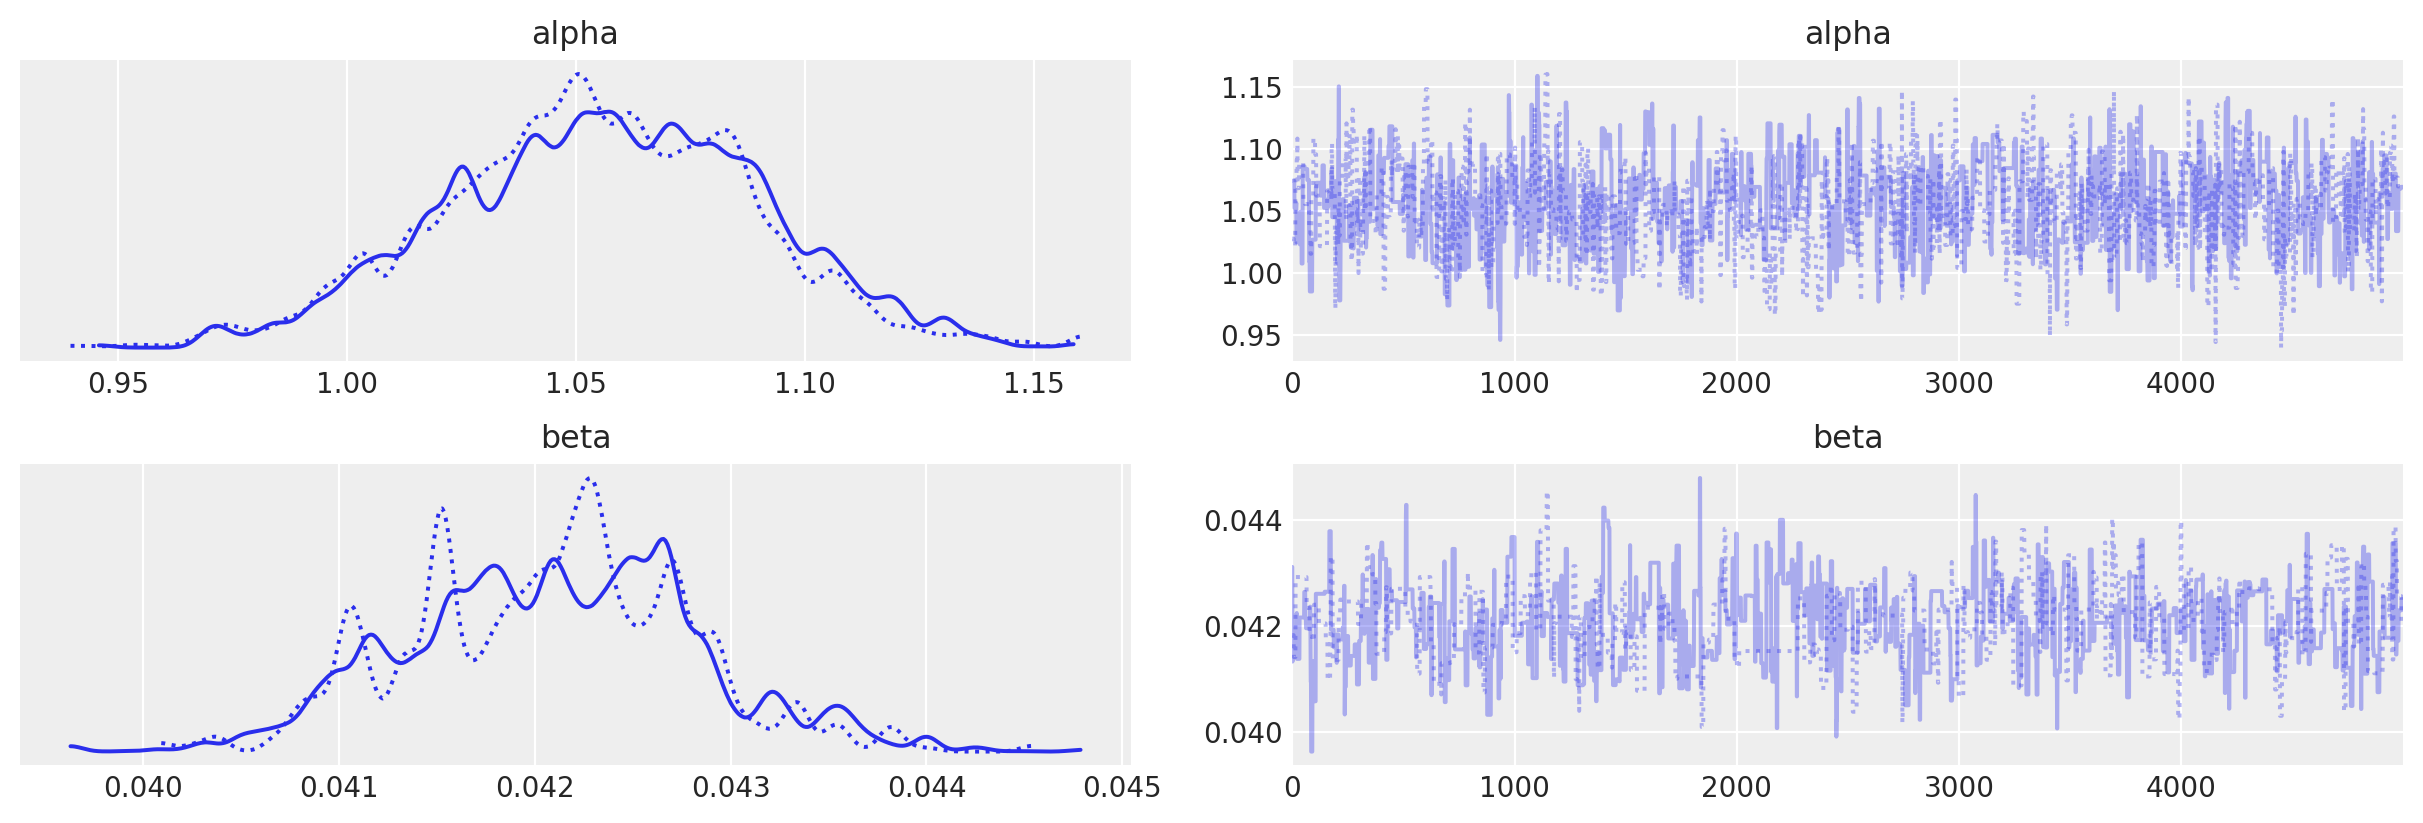

In [237]:
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

figsize(12, 6)
az.plot_trace(wake_trace, ['alpha', 'beta']);
# pm.traceplot(sleep_trace, ['alpha', 'beta']);

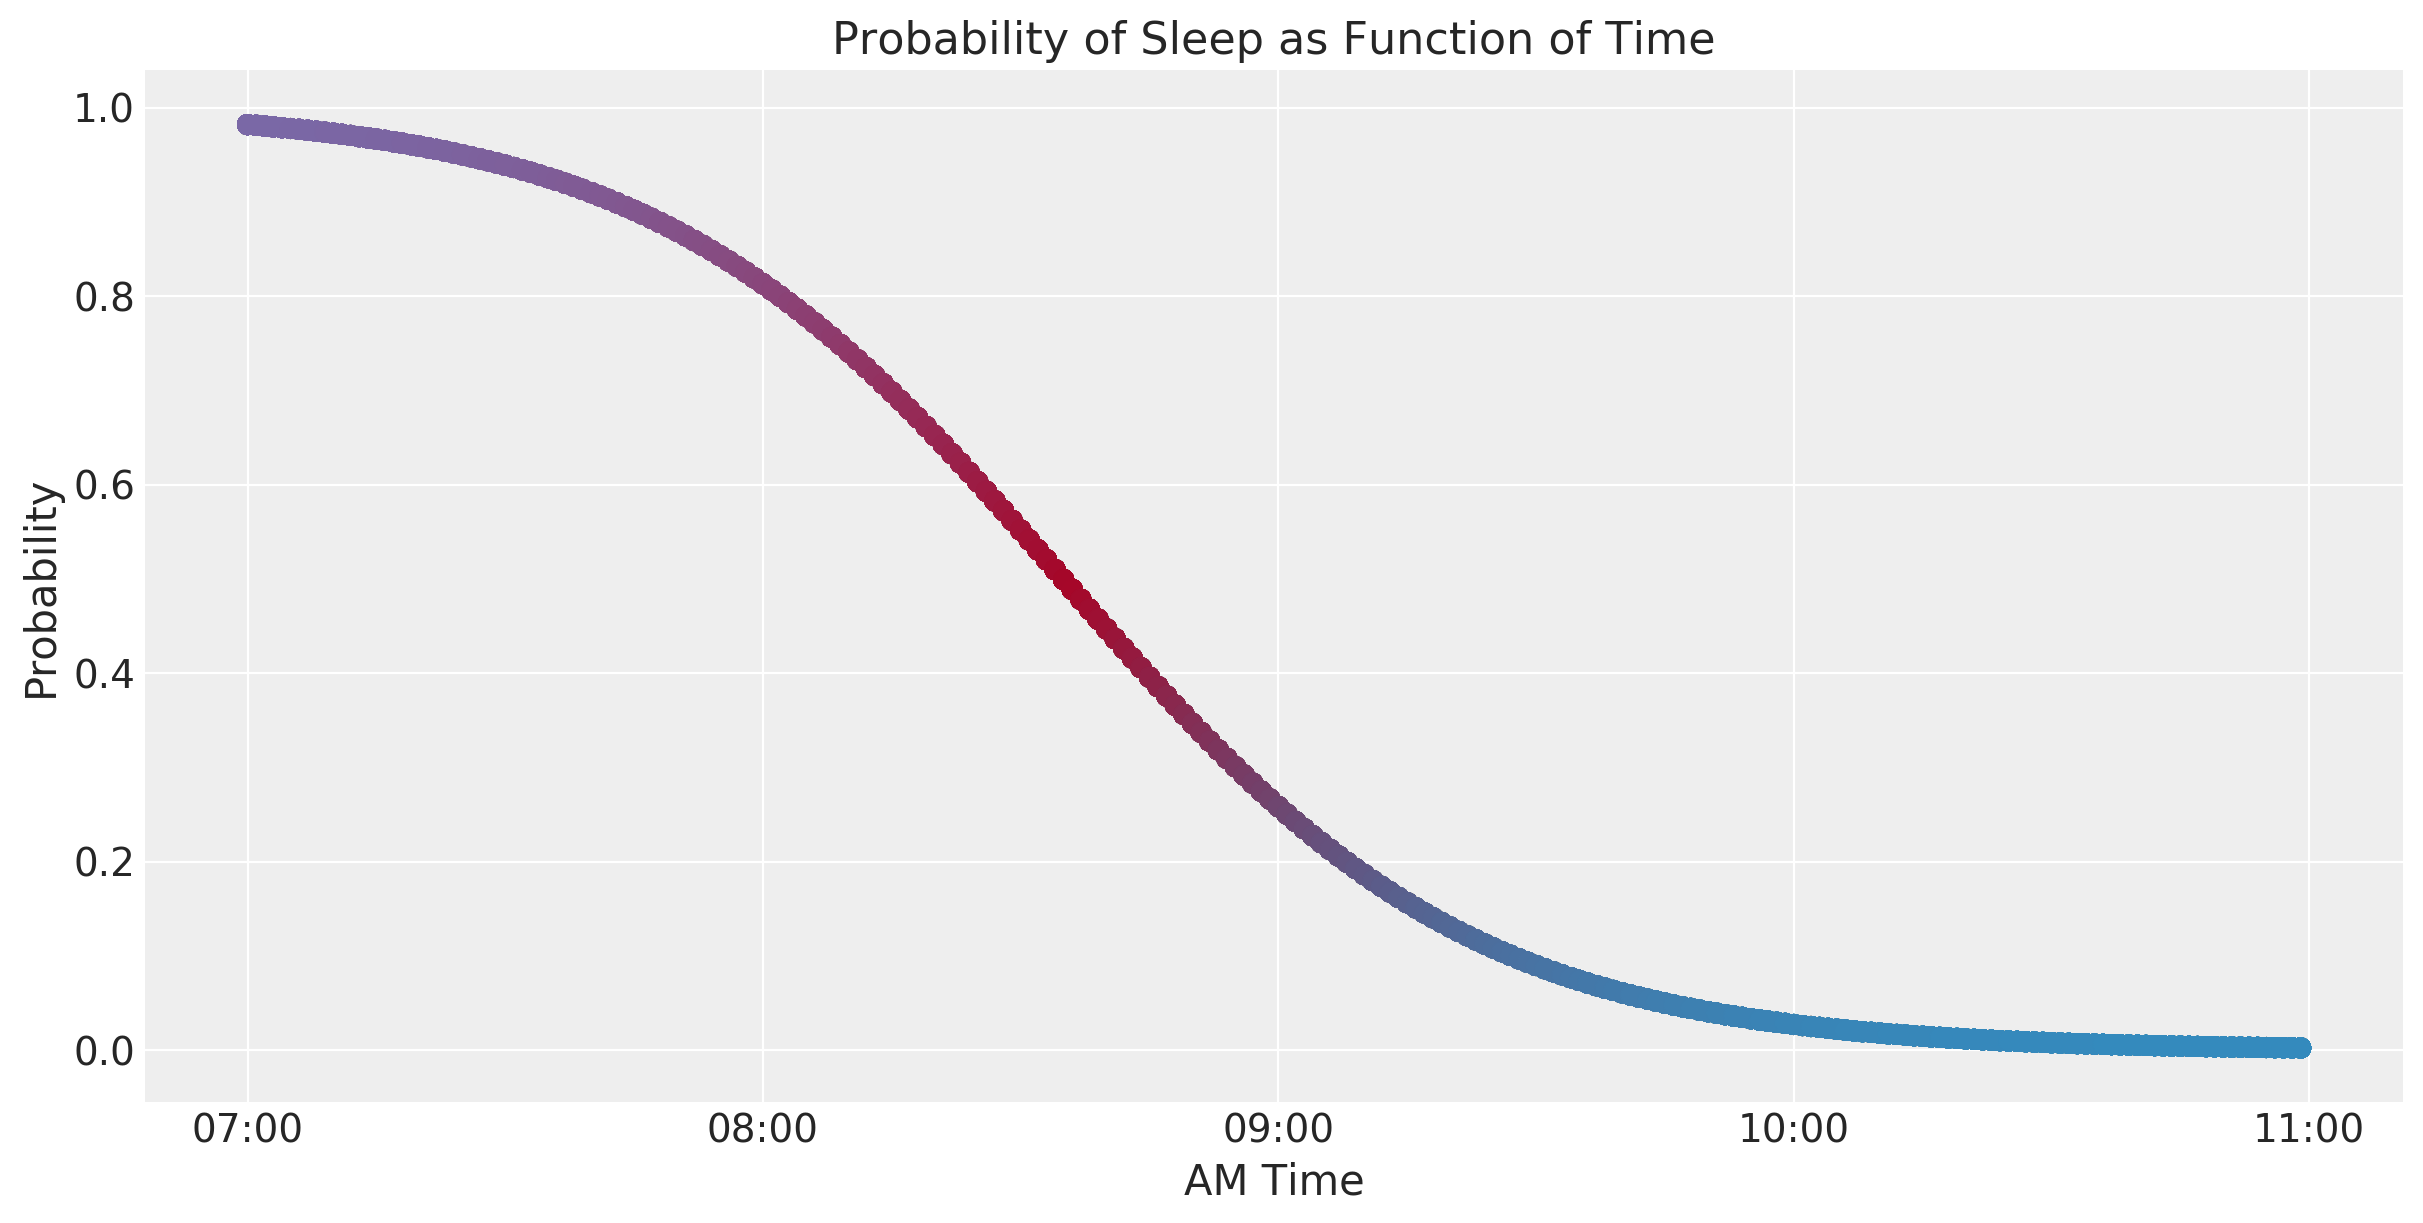

In [277]:
colors = ["#348ABD", "#A60628", "#7A68A6"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("BMH", colors)
figsize(12, 6)
probs = wake_trace['p']

plt.scatter(time, probs.mean(axis=0), cmap = cmap, 
            c = probs.mean(axis=0), s = 50);
plt.title('Probability of  as Function of Time')
plt.xlabel('AM Time');
plt.ylabel('Probability');
plt.xticks([-120, -60, 0, 60, 120], wake_labels);

# Model for Sleep Duration

We can also model the sleep duration. We can initially take a look at the data before figuring out 
which function fits the probability distribution

- I have saved sleep duration in the previous table named spt

In [280]:
spt.head()

,startDate,endDate,sleepDuration
endDate,,,
2020-11-22,2020-11-22 00:31:00,2020-11-22 08:21:00,470.000000
2020-11-23,2020-11-23 00:25:22,2020-11-23 08:32:00,486.633333
2020-11-24,2020-11-24 00:55:00,2020-11-24 08:07:00,432.000000
2020-11-25,2020-11-25 00:14:58,2020-11-25 08:18:00,483.033333
2020-11-26,2020-11-26 01:12:00,2020-11-26 08:02:00,410.000000


In [282]:
duration = spt['sleepDuration']

52

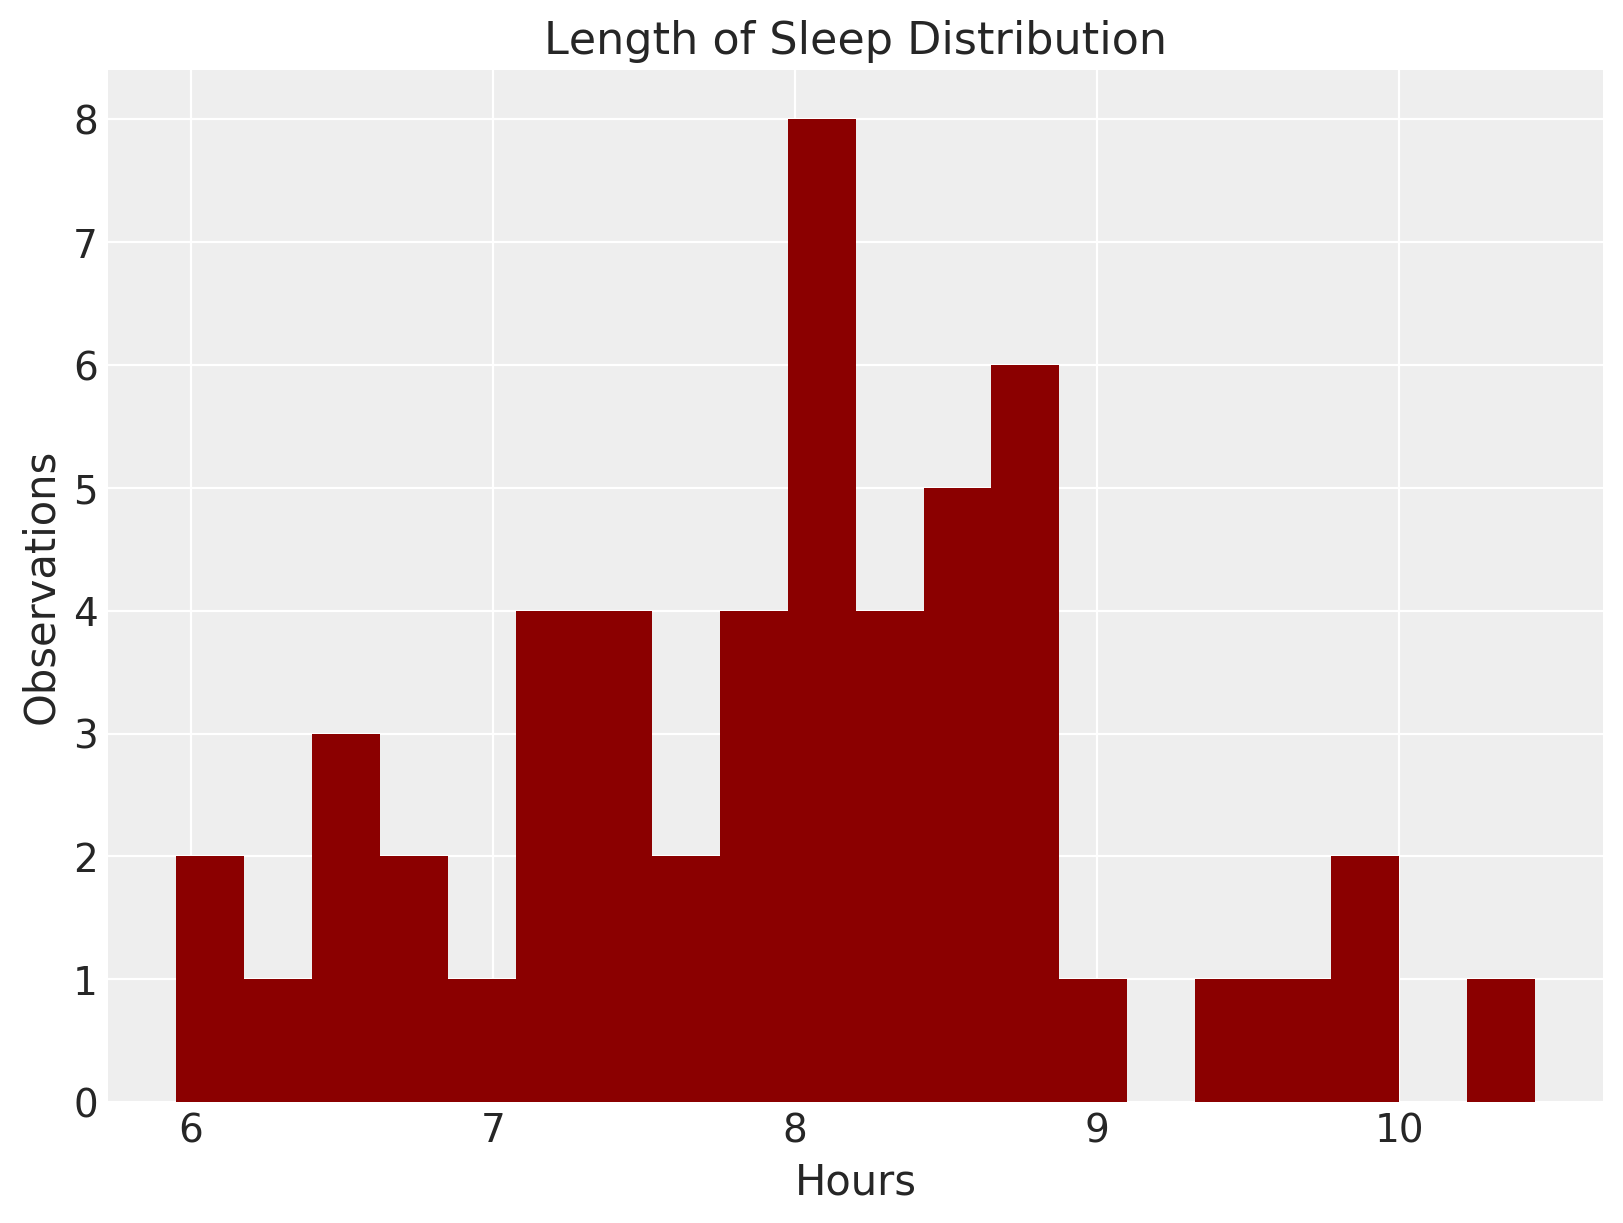

In [287]:
figsize(8, 6)
plt.hist(duration/60, bins = 20, color = 'darkred')
plt.xlabel('Hours'); plt.title('Length of Sleep Distribution'); 
plt.ylabel('Observations');

/Users/obara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/obara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


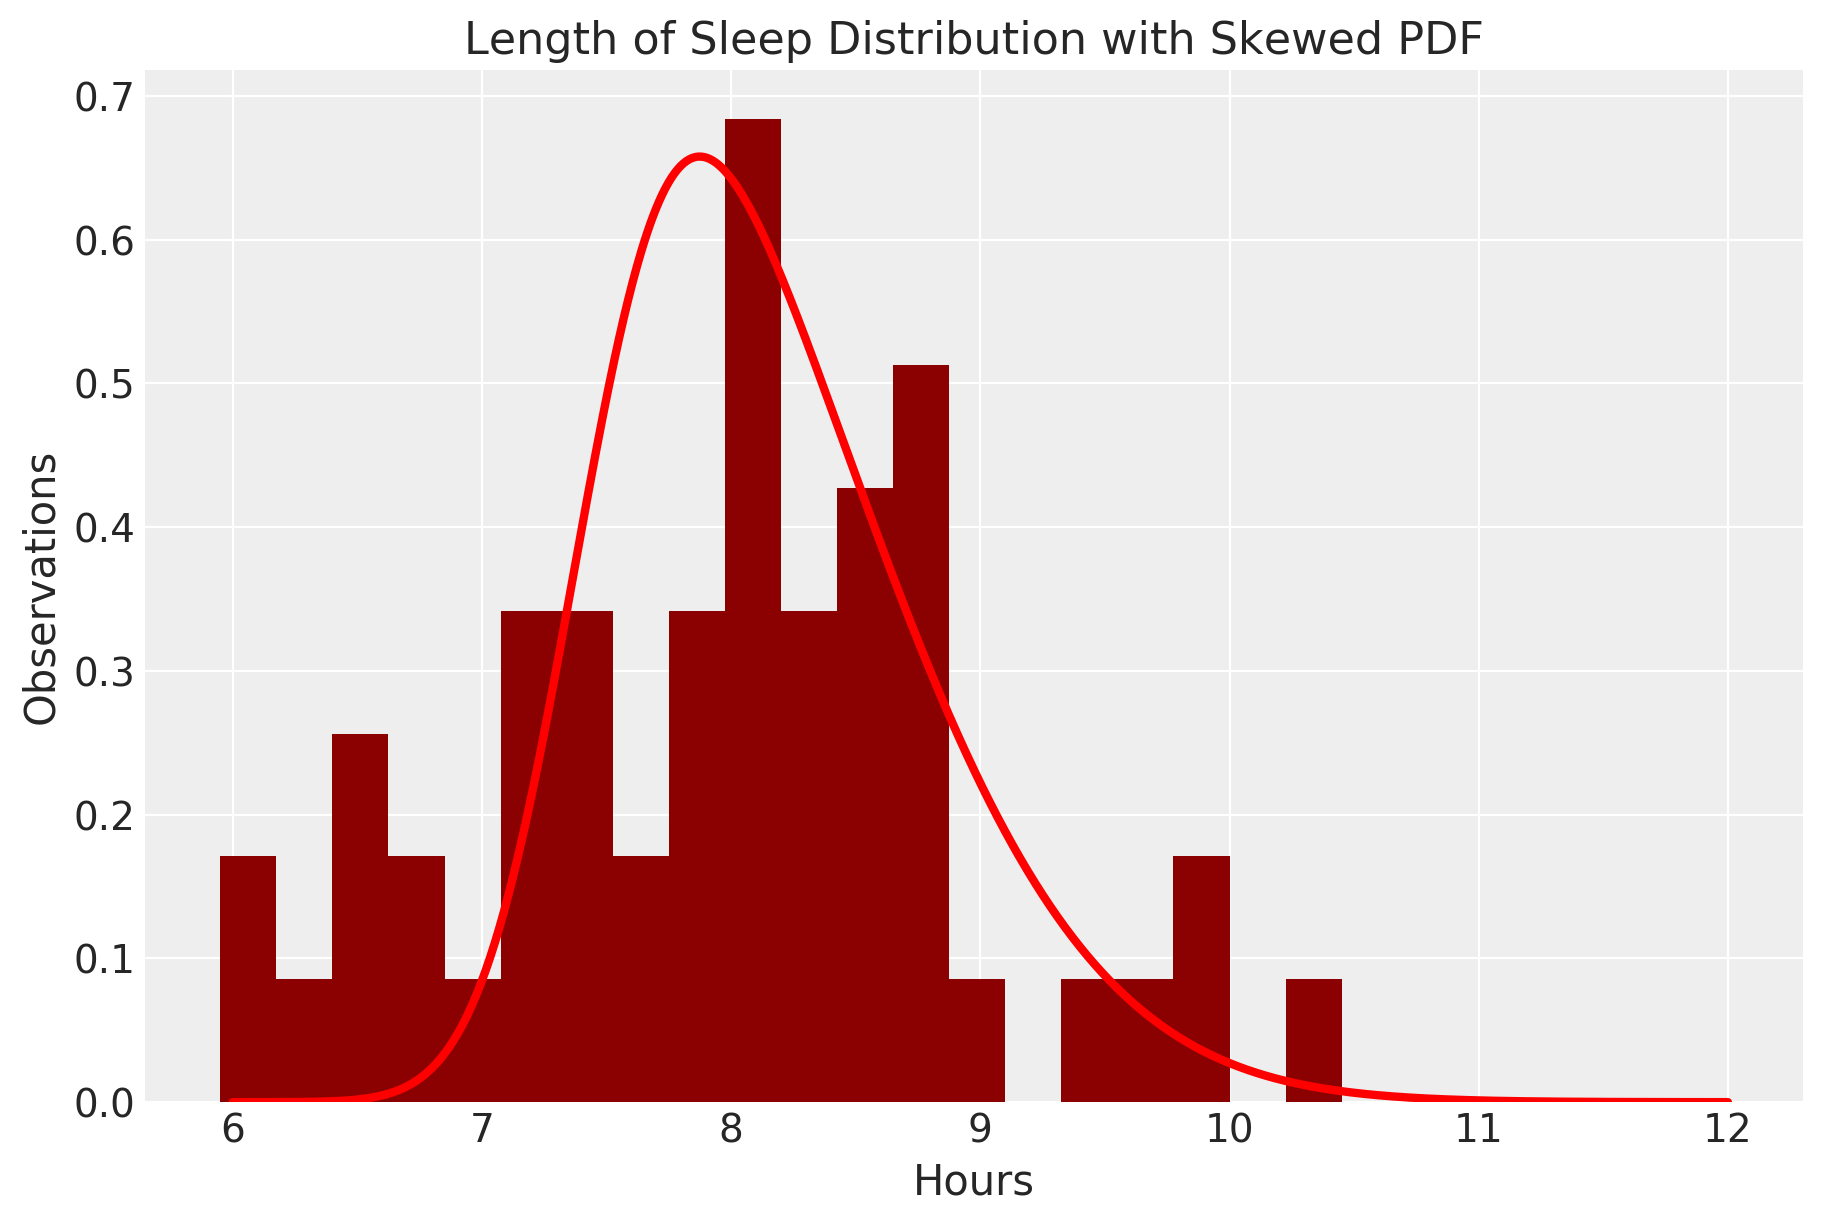

In [292]:
a = 3
fig, ax = plt.subplots(1, 1)
x = np.linspace(6, 12, 1e3)


figsize(8, 6)
plt.hist(duration/60, bins = 20, color = 'darkred', normed=True)
plt.xlabel('Hours'); plt.title('Length of Sleep Distribution with Skewed PDF'); 
plt.ylabel('Observations');
plt.plot(x, stats.skewnorm.pdf(x, a, loc = 7.4, scale=1), 'r-', 
         lw=3, label='skewnorm pdf');

In [294]:
with pm.Model() as duration_model:
    # Three parameters to sample
    alpha_skew = pm.Normal('alpha_skew', mu=0, tau=0.5, testval=3.0)
    mu_ = pm.Normal('mu', mu=0, tau=0.5, testval=7.4)
    tau_ = pm.Normal('tau', mu=0, tau=0.5, testval=1.0)
    
    # Duration is a deterministic variable
    duration_ = pm.SkewNormal('duration', alpha = alpha_skew, mu = mu_, 
                              sd = 1/tau_, observed = duration/60)
    
    # Metropolis Hastings for sampling
    step = pm.Metropolis()
    duration_trace = pm.sample(N_SAMPLES, step=step)

/Users/obara/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [mu]
>Metropolis: [alpha_skew]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 25 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


## Extract the mean of the parameters

In [296]:
# Extract the most likely estimates from the sampling
alpha_skew_samples = duration_trace['alpha_skew'][5000:]
mu_samples = duration_trace['mu'][5000:]
tau_samples = duration_trace['tau'][5000:]

alpha_skew_est = alpha_skew_samples.mean()
mu_est = mu_samples.mean()
tau_est = tau_samples.mean()

## See the Posterior and the data

/Users/obara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


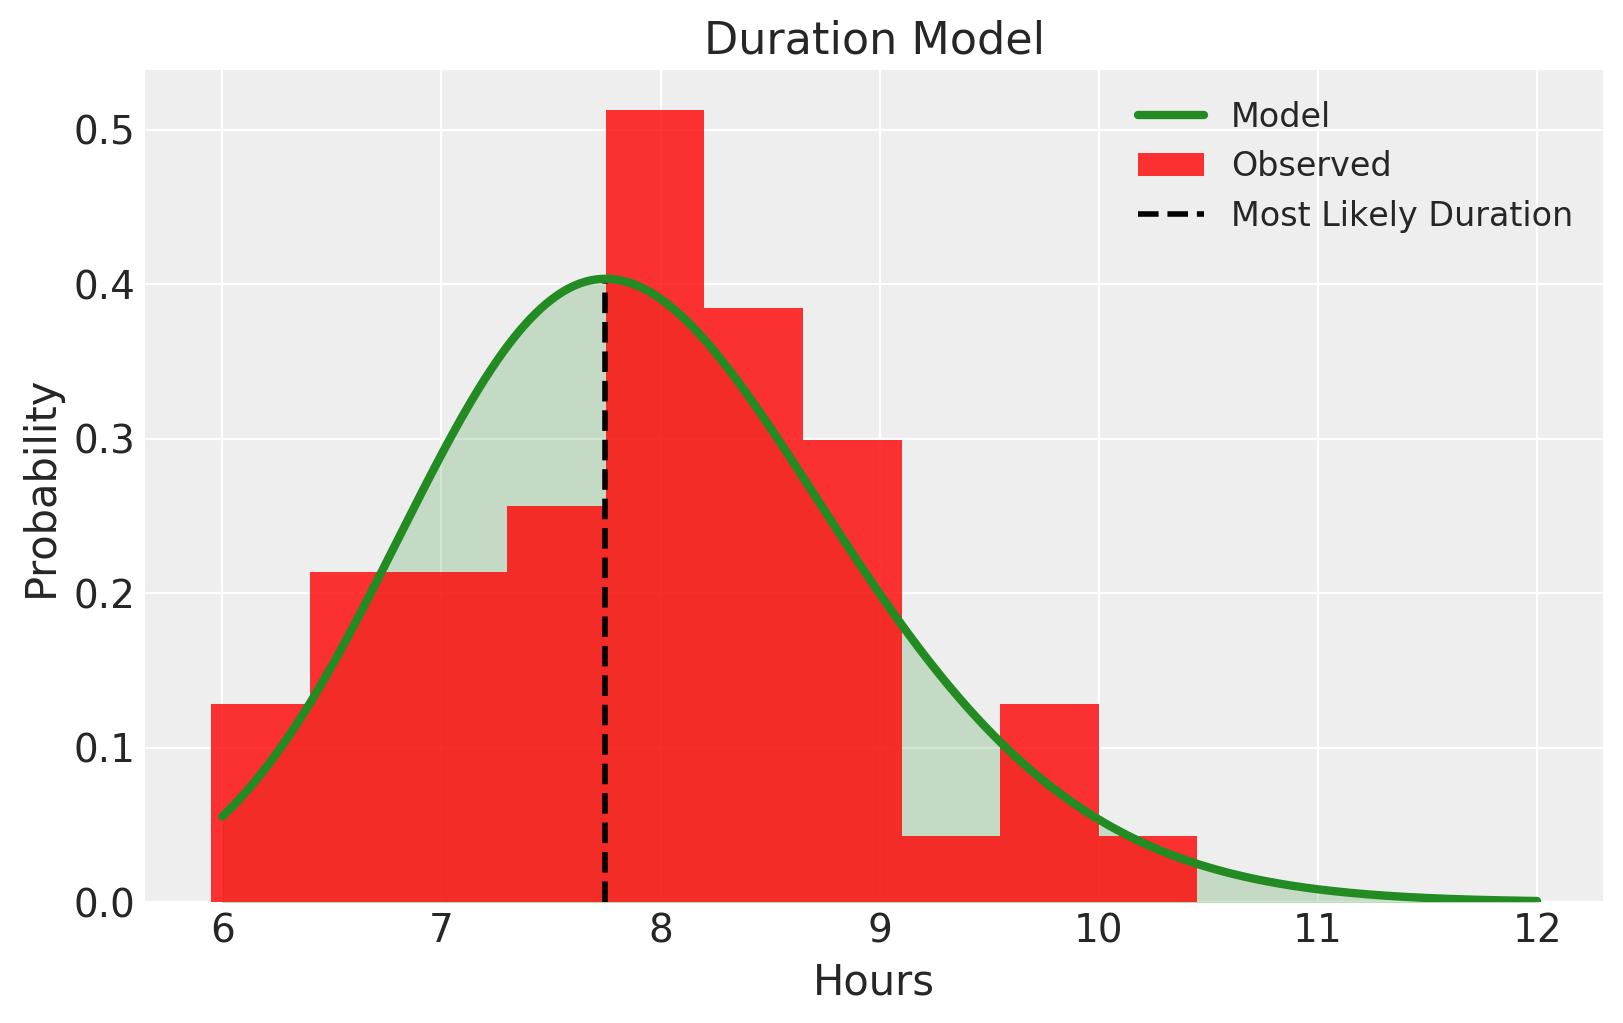

In [305]:
x = np.linspace(6, 12, 1000)
y = stats.skewnorm.pdf(x, a = alpha_skew_est, loc=mu_est, scale=1/tau_est)
figsize(8, 5)
# Plot the posterior distribution
plt.plot(x, y, color = 'forestgreen', 
         label = 'Model', lw = 3)
plt.fill_between(x, y, color = 'forestgreen', alpha = 0.2);

# Plot the observed values
plt.hist(duration/60, bins=10, color = 'red', alpha=0.8,
         label='Observed', normed=True)
plt.xlabel('Hours'); plt.ylabel('Probability'); 
plt.title('Duration Model');
plt.vlines(x = x[np.argmax(y)], ymin=0, ymax=y.max(), 
           linestyles='--', linewidth=2, color='k', 
           label = 'Most Likely Duration');
plt.legend(prop={'size':12});

## Some Insight about the Posterior

In [307]:
print('Probability of at least 6.5 hours of sleep = {:.2f}%.'.
      format(100 * (1 - stats.skewnorm.cdf(6.5, a = alpha_skew_est, loc = mu_est, scale = 1/tau_est))))
print('Probability of at least 8.0 hours of sleep = {:.2f}%.'.
      format(100 * (1 - stats.skewnorm.cdf(8.0, a = alpha_skew_est, loc = mu_est, scale = 1/tau_est))))
print('Probability of at least 9.0 hours of sleep = {:.2f}%.'.
      format(100 * (1 - stats.skewnorm.cdf(9.0, a = alpha_skew_est, loc = mu_est, scale = 1/tau_est))))
print('The most likely duration of sleep is {:.2f} hours.'.format(x[np.argmax(y)]))

Probability of at least 6.5 hours of sleep = 93.14%.
Probability of at least 8.0 hours of sleep = 44.85%.
Probability of at least 9.0 hours of sleep = 14.51%.
The most likely duration of sleep is 7.75 hours.


# Conclusion

I have always wanted to work on this project. That is, using real sleep data from my Garmin watch and try to derive some insightful information.

Given what we have seen, we can summarize the most important point as follows:
- **On average I sleep around `00:37`**
- **On average I wake up around `08:36`**
- **My average sleep duration is  `7.75 hours`**

I used for this project 52 days in total. It is of course possible to expand the number of days to improve the derived information.
- It is possible to even go further in our analysis of the sleeping data by investigating the heart rate data and how they are related to our sleeping periods.
- We can see how our workouts affect our sleep also as an example. 
